In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
import pandas as pd
import numpy as np
import os, json, time
from sklearn import metrics
from scipy.stats import pearsonr, spearmanr, zscore

# Get data and scores

In [2]:
# get group names for display purposes (and assert that names unique)
grp_names = json.load(open("./group_mappings.json"))
assert len(grp_names) == len(set(grp_names.values()))

In [3]:
all_data = json.load(open("./processed_data/ts_lddt_processed.json"))
df = pd.DataFrame(all_data)

In [4]:
df

trg_name group_id mdl_id      mdl_name  \
0        T1104      003      1  T1104TS003_1   
1        T1104      003      2  T1104TS003_2   
2        T1104      003      3  T1104TS003_3   
3        T1104      003      4  T1104TS003_4   
4        T1104      003      5  T1104TS003_5   
...        ...      ...    ...           ...   
36071    T1197      481      1  T1197TS481_1   
36072    T1197      481      2  T1197TS481_2   
36073    T1197      481      3  T1197TS481_3   
36074    T1197      481      4  T1197TS481_4   
36075    T1197      481      5  T1197TS481_5   

                                       matched_lddts_ref  \
0      [45.5, 83.39, 70.21, 75.35, 83.16, 74.34, 86.9...   
1      [45.92, 83.97, 73.28, 76.07, 84.36, 75.73, 87....   
2      [46.76, 86.52, 73.1, 76.42, 89.71, 81.25, 88.2...   
3      [46.64, 84.94, 74.65, 77.13, 84.87, 76.06, 87....   
4      [45.31, 84.31, 74.19, 77.71, 84.57, 75.05, 87....   
...                                                  ...   
36071  [61.16, 52.62, 59.89, 33.71, 35.5, 25.48, 27.6...   
36072  [62.83, 57.66, 51.09, 29.86, 29.64, 26.68, 27....   
36073  [64.73, 60.77, 59.79, 42.97, 44.25, 36.72, 29....   
36074  [59.38, 59.18, 63.97, 37.34, 39.45, 26.86, 27....   
36075  [59.15, 52.31, 60.39, 33.25, 35.7, 24.82, 27.6...   

                                       matched_lddts_mdl  \
0      [78.86, 88.73, 90.56, 93.17, 95.82, 95.52, 97....   
1      [78.1, 87.19, 89.81, 92.72, 95.33, 94.81, 97.5...   
2      [73.66, 88.0, 91.39, 92.34, 94.48, 94.49, 96.2...   
3      [78.36, 88.2, 90.29, 92.94, 95.53, 94.99, 97.7...   
4      [79.4, 89.65, 91.32, 93.97, 96.26, 95.65, 97.9...   
...                                                  ...   
36071  [72.23, 70.85, 68.8, 70.0, 67.89, 67.43, 70.75...   
36072  [80.7, 78.78, 81.32, 75.86, 78.38, 80.39, 81.0...   
36073  [90.52, 89.62, 89.72, 92.4, 92.77, 94.56, 96.1...   
36074  [37.73, 49.65, 52.01, 44.42, 53.75, 36.01, 37....   
36075  [51.01, 58.04, 61.73, 55.43, 59.01, 50.98, 45....   

                                        matched_res_nums q_prob_indices  \
0      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...             []   
1      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...             []   
2      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...             []   
3      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...             []   
4      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...             []   
...                                                  ...            ...   
36071  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...             []   
36072  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...             []   
36073  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...             []   
36074  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...             []   
36075  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...             []   

       num_non_matched  failed  \
0                    0   False   
1                    0   False   
2                    0   False   
3                    0   False   
4                    0   False   
...                ...     ...   
36071                3   False   
36072                3   False   
36073                3   False   
36074                3   False   
36075                3   False   

                                      matched_lddts_base  
0      [84.64, 87.47, 89.9, 90.96, 90.7, 88.97, 91.09...  
1      [84.83, 87.7, 90.23, 91.16, 91.04, 89.23, 91.1...  
2      [85.29, 88.43, 90.07, 91.14, 91.19, 89.38, 90....  
3      [84.92, 87.9, 90.32, 91.18, 91.09, 89.32, 91.1...  
4      [84.93, 87.14, 89.52, 90.8, 90.66, 89.01, 91.1...  
...                                                  ...  
36071  [73.66, 74.3, 70.76, 68.21, 64.18, 63.14, 59.2...  
36072  [43.87, 36.39, 34.24, 34.7, 30.33, 33.96, 42.6...  
36073  [61.83, 55.16, 51.62, 46.52, 38.0, 32.88, 35.0...  
36074  [70.99, 71.17, 68.41, 65.5, 58.83, 56.35, 51.5...  
36075  [73.73, 74.82, 71.01,

In [5]:
print(json.dumps(df.groupby("trg_name")["trg_name"].count().to_dict()))
print()
print(json.dumps(df.groupby("group_id")["group_id"].count().to_dict()))
print()
print(json.dumps(df.groupby("mdl_id")["mdl_id"].count().to_dict()))

{"T1104": 415, "T1106s1": 504, "T1106s2": 509, "T1109": 498, "T1110": 498, "T1112": 439, "T1113": 514, "T1114s1": 525, "T1114s2": 517, "T1114s3": 515, "T1115": 487, "T1119": 514, "T1120": 447, "T1121": 509, "T1122": 436, "T1123": 521, "T1124": 541, "T1125": 415, "T1127": 550, "T1129s2": 494, "T1130": 434, "T1131": 437, "T1132": 513, "T1133": 438, "T1134s1": 512, "T1134s2": 517, "T1137s1": 415, "T1137s2": 410, "T1137s3": 405, "T1137s4": 419, "T1137s5": 418, "T1137s6": 419, "T1137s7": 424, "T1137s8": 426, "T1137s9": 427, "T1139": 439, "T1145": 443, "T1146": 512, "T1147": 432, "T1150": 446, "T1151s2": 511, "T1152": 545, "T1153": 507, "T1154": 405, "T1155": 446, "T1157s1": 484, "T1157s2": 510, "T1158": 421, "T1159": 433, "T1160": 513, "T1161": 512, "T1162": 437, "T1163": 431, "T1165": 380, "T1169": 369, "T1170": 501, "T1173": 483, "T1174": 492, "T1175": 429, "T1176": 496, "T1177": 412, "T1178": 499, "T1179": 506, "T1180": 433, "T1181": 533, "T1182": 412, "T1183": 423, "T1184": 499, "T1185s

In [6]:
# count Q. probs
len(df[df.q_prob_indices.apply(len) > 0])

4940

In [7]:
# show any failed one
df[df.failed]

Empty DataFrame
Columns: [trg_name, group_id, mdl_id, mdl_name, matched_lddts_ref, matched_lddts_mdl, matched_res_nums, q_prob_indices, num_non_matched, failed, matched_lddts_base]
Index: []

In [8]:
# how to get top model only? (first ok since data sorted)
top_df = df[~df.failed].groupby(["trg_name", "group_id"]).first()
for idx, row in top_df[top_df.mdl_id != "1"].iterrows():
    str_msg = f"TOP MODEL: {idx[0]}, {idx[1]}, {row.mdl_id}"
    if any((df.trg_name == idx[0]) & \
           (df.group_id == idx[1]) & \
           (df.mdl_id == "1") & df.failed):
        str_msg += " (due to scoring failure)"
    print(str_msg)
# NOTE: ok to have missing mdl 1
# (from Andriy: "Sometimes model 1 does not pass our format checks and people do not bother to resubmit")

TOP MODEL: T1104, 133, 5
TOP MODEL: T1112, 215, 5
TOP MODEL: T1114s2, 447, 2
TOP MODEL: T1133, 276, 2
TOP MODEL: T1145, 278, 2
TOP MODEL: T1153, 314, 2
TOP MODEL: T1170, 122, 2


In [9]:
# process mdl 1 only
df1 = df[df.mdl_id == "1"].copy()

In [10]:
# calculate all the scores...
def _calc_scores(lddt_ref, lddt_mdl, lddt_cutoff=60):
    """Fetch all the scores.
    Return scores as dictionary.
    Note for AUCs: set to None if only one type of labels."""
    # NOTES:
    # - CAMEO has lDDT cutoff (here in [0,100]) at 60
    # - ASE from CASP: https://predictioncenter.org/casp15/doc/help.html#ASE
    # - ASE as RMSD: simply RMSD of error
    lddt_ref = np.asarray(lddt_ref)
    lddt_mdl = np.asarray(lddt_mdl)
    lddt_label = (lddt_ref > lddt_cutoff)
    lddt_mdl_min = lddt_mdl.min()
    lddt_mdl_max = lddt_mdl.max()
    if lddt_mdl_min == lddt_mdl_max:
        pearson_r = None
        spearman_r = None
    else:
        pearson_r = pearsonr(lddt_ref, lddt_mdl)[0]
        spearman_r = spearmanr(lddt_ref, lddt_mdl).correlation
    if not any(lddt_label) or all(lddt_label):
        roc_auc = None
        pr_auc = None
    else:
        roc_auc = metrics.roc_auc_score(lddt_label, lddt_mdl)
        precision, recall, _ = metrics.precision_recall_curve(lddt_label, lddt_mdl)
        pr_auc = metrics.auc(recall, precision)
    ratio_good = lddt_label.sum() / len(lddt_label)
    return {
        "pearson_r": pearson_r,
        "spearman_r": spearman_r,
        "ase_casp": 100 - np.abs(lddt_mdl - lddt_ref).mean(),
        "ase_rmsd": np.sqrt(((lddt_mdl - lddt_ref) ** 2).mean()),
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "ratio_good": ratio_good,
        "ratio_bad": 1 - ratio_good,
        "lddt_ref_min": lddt_ref.min(),
        "lddt_ref_max": lddt_ref.max(),
        "lddt_mdl_min": lddt_mdl_min,
        "lddt_mdl_max": lddt_mdl_max,
    }

t0 = time.time()
for idx, row in df1.iterrows():
    scores = _calc_scores(row.matched_lddts_ref, row.matched_lddts_mdl)
    for key, val in scores.items():
        df1.at[idx, key] = val
print(time.time() - t0)

20.143952131271362


In [11]:
df1

trg_name group_id mdl_id      mdl_name  \
0        T1104      003      1  T1104TS003_1   
5        T1104      008      1  T1104TS008_1   
10       T1104      018      1  T1104TS018_1   
15       T1104      035      1  T1104TS035_1   
20       T1104      037      1  T1104TS037_1   
...        ...      ...    ...           ...   
36058    T1197      466      1  T1197TS466_1   
36063    T1197      475      1  T1197TS475_1   
36068    T1197      477      1  T1197TS477_1   
36070    T1197      478      1  T1197TS478_1   
36071    T1197      481      1  T1197TS481_1   

                                       matched_lddts_ref  \
0      [45.5, 83.39, 70.21, 75.35, 83.16, 74.34, 86.9...   
5      [44.89, 82.98, 73.65, 75.84, 86.75, 76.11, 85....   
10     [45.8, 82.57, 67.21, 75.84, 82.38, 66.27, 84.9...   
15     [49.27, 92.14, 77.54, 78.53, 92.58, 88.29, 92....   
20     [46.99, 89.94, 76.15, 79.07, 92.12, 83.91, 90....   
...                                                  ...   
36058  [62.72, 55.9, 51.74, 32.7, 32.73, 27.6, 34.75,...   
36063  [64.06, 55.66, 50.55, 32.36, 33.02, 28.1, 34.8...   
36068  [53.01, 51.58, 60.98, 37.66, 37.32, 26.81, 28....   
36070  [70.54, 51.52, 54.03, 33.47, 29.6, 23.83, 28.6...   
36071  [61.16, 52.62, 59.89, 33.71, 35.5, 25.48, 27.6...   

                                       matched_lddts_mdl  \
0      [78.86, 88.73, 90.56, 93.17, 95.82, 95.52, 97....   
5      [74.71, 87.72, 90.33, 91.91, 94.37, 93.14, 96....   
10     [85.09, 90.42, 92.22, 94.65, 95.9, 94.43, 95.3...   
15     [81.13, 91.11, 93.44, 94.8, 96.62, 96.16, 98.1...   
20     [81.03, 92.6, 94.41, 95.79, 96.53, 96.11, 97.6...   
...                                                  ...   
36058  [60.75, 54.17, 65.19, 63.39, 60.48, 57.21, 60....   
36063  [70.35, 73.62, 75.47, 74.59, 74.97, 72.84, 75....   
36068  [50.07, 55.49, 59.77, 55.77, 53.83, 44.05, 40....   
36070  [30.33, 30.06, 35.87, 35.88, 39.79, 32.92, 37....   
36071  [72.23, 70.85, 68.8, 70.0, 67.89, 67.43, 70.75...   

                                        matched_res_nums q_prob_indices  \
0      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...             []   
5      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...             []   
10     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...             []   
15     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...             []   
20     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...             []   
...                                                  ...            ...   
36058  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...             []   
36063  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...             []   
36068  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...             []   
36070  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...             []   
36071  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...             []   

       num_non_matched  failed  ...   ase_casp   ase_rmsd   roc_auc    pr_auc  \
0                    0   False  ...  79.301453  23.555081  0.949149  0.986829   
5                    0   False  ...  92.545726   9.986106  0.881687  0.987012   
10                   0   False  ...  85.844615  15.846634  0.947647  0.990917   
15                   0   False  ...  91.782137  12.687564  0.975664  0.999120   
20                   0   False  ...  93.014957  10.709362  0.986726  0.999532   
...                ...     ...  ...        ...        ...       ...       ...   
36058                3   False  ...  82.559860  19.742569  0.922826  0.985424   
36063                3   False  ...  81.580944  20.875074  0.911104  0.983797   
36068                3   False  ...  77.975035  24.825529  0.964731  0.986714   
36070                3   False  ...  81.213287  20.908897  0.958533  0.982467   
36071                3   False  ...  82.777622  20.346460  0.934802  0.970654   

       ratio_good  ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  \
0        0.794872   0.205128         30

# Per group data (raw processing and checks)
## Check covered residues

In [12]:
# check total num. of res. from models (i.e. matched + non_matched)
df1["num_q_prob"] = df1.q_prob_indices.apply(len)
df1["num_matched"] = df1.matched_lddts_ref.apply(len)
dfg = df1.groupby("group_id")
dfpg_tst = pd.DataFrame()
dfpg_tst["trg_count"] = dfg["group_id"].count()
dfpg_tst["num_matched"] = dfg["num_matched"].sum()
dfpg_tst["num_non_matched"] = dfg["num_non_matched"].sum()
dfpg_tst["num_q_prob"] = dfg["num_q_prob"].sum()
dfpg_tst["num_res"] = dfpg_tst["num_matched"] + dfpg_tst["num_non_matched"]
dfpg_tst.sort_values("num_res").tail()

trg_count  num_matched  num_non_matched  num_q_prob  num_res
group_id                                                              
298              77        28456             4305          33    32761
315              77        28456             4305          23    32761
342              77        28456             4305          22    32761
383              77        28456             4305          34    32761
270              77        28456             4305          21    32761

In [13]:
# check how many have the same max. total num_res
len(dfpg_tst), sum(dfpg_tst.num_res.max() == dfpg_tst.num_res)

(133, 38)

## Average per target evaluations

In [14]:
# group data
df1["num_q_prob"] = df1.q_prob_indices.apply(len)
df1["num_matched"] = df1.matched_lddts_ref.apply(len)
df1["avg_lddt"] = df1.matched_lddts_ref.apply(np.mean)
dfg = df1.groupby("group_id")
dfpg = pd.DataFrame()
dfpg["trg_count"] = dfg["group_id"].count()
dfpg["num_matched"] = dfg["num_matched"].sum()
dfpg["num_q_prob"] = dfg["num_q_prob"].sum()
dfpg["num_r"] = dfg["pearson_r"].count()
dfpg["num_auc"] = dfg["roc_auc"].count()
dfpg["avg_lddt"] = dfg["avg_lddt"].mean()
my_scores = ['pearson_r', 'spearman_r', 'ase_casp', 'ase_rmsd', 'roc_auc', 'pr_auc']
for k in my_scores:
    dfpg[f"avg_{k}"] = dfg[k].mean()
dfpg["lddt_mdl_min"] = dfg["lddt_mdl_min"].min()
dfpg["lddt_mdl_max"] = dfg["lddt_mdl_max"].max()

In [15]:
dfpg

trg_count  num_matched  num_q_prob  num_r  num_auc   avg_lddt  \
group_id                                                                  
003              77        28456           7     77       66  78.804259   
006              21         3202          99      0        2  17.162645   
008              76        27763           0     76       70  77.494015   
011              76        27422          39     76       69  75.907391   
014               3          923           0      3        3  66.403660   
...             ...          ...         ...    ...      ...        ...   
481              75        28063           9     75       68  77.547893   
488               1          117           3      1        0   4.320513   
493              27         7137           0     26       25  75.621505   
494              49        21160           6     49       44  80.177206   
498              25         6566         598     25       19  47.596433   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
003            0.501744        0.472902     80.937167     21.921570   
006                 NaN             NaN     82.837355     19.611938   
008            0.495548        0.466557     87.267139     15.913225   
011            0.612516        0.588669     86.928343     15.874302   
014            0.717187        0.710345     74.185889     28.007352   
...                 ...             ...           ...           ...   
481            0.590608        0.557614     89.539456     13.405629   
488           -0.234555       -0.077647     94.643675      7.723126   
493            0.653499        0.586645     86.338377     16.525268   
494            0.262969        0.270237     81.931710     22.030675   
498           -0.256347       -0.260183     53.279485     49.711238   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
003          0.800352    0.923296          0.00         98.98  
006          0.500000    0.551961          0.00          0.00  
008          0.840329    0.957435         10.18         99.99  
011          0.884615    0.945415         16.36         98.94  
014          0.870922    0.936855         27.68         98.86  
...               ...         ...           ...           ...  
481          0.869146    0.931719         15.46         98.97  
488               NaN         NaN          0.14          8.21  
493          0.891048    0.925058          0.00         98.98  
494          0.718786    0.921320          0.00         93.21  
498          0.343030    0.429890          0.74          1.29  

[133 rows x 14 columns]

In [16]:
# check lDDT ranges
slmm = sorted(dfpg.lddt_mdl_min)
print(slmm[0], slmm[-1])
slmm = sorted(dfpg.lddt_mdl_max)
print(slmm[0], slmm[-1])
display(dfpg[dfpg.lddt_mdl_max < 1])
display(dfpg[(dfpg.lddt_mdl_min == dfpg.lddt_mdl_max) & (dfpg.lddt_mdl_max >= 1)])

0.0 50.11
0.0 100.0


trg_count  num_matched  num_q_prob  num_r  num_auc   avg_lddt  \
group_id                                                                  
006              21         3202          99      0        2  17.162645   
064              46         8974         165     46       45  70.775423   
122               7         2333           5      0        7  85.206028   
291              22         5705           1      0       21  74.823568   
312              27         6667           3      0       25  76.901630   
350              35         9490           5      0       30  77.890636   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
006                 NaN             NaN     82.837355     19.611938   
064            0.022628        0.026504     29.759168     72.095738   
122                 NaN             NaN     14.793972     86.217009   
291                 NaN             NaN     25.176432     76.552101   
312                 NaN             NaN     23.098370     78.709250   
350                 NaN             NaN     22.109364     79.299284   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
006          0.500000    0.551961           0.0           0.0  
064          0.523304    0.805985           0.4           0.7  
122          0.500000    0.968462           0.0           0.0  
291          0.500000    0.886668           0.0           0.0  
312          0.500000    0.904652           0.0           0.0  
350          0.500000    0.904735           0.0           0.0

Empty DataFrame
Columns: [trg_count, num_matched, num_q_prob, num_r, num_auc, avg_lddt, avg_pearson_r, avg_spearman_r, avg_ase_casp, avg_ase_rmsd, avg_roc_auc, avg_pr_auc, lddt_mdl_min, lddt_mdl_max]
Index: []

In [17]:
# top stuff?
max_trg_count = len(set(df.trg_name))
print("MAX. TRG COUNT", max_trg_count)
print("MAX. MATCHED", max(dfpg.num_matched))
dfpg.sort_values("num_q_prob", ascending=False).head()

MAX. TRG COUNT 77
MAX. MATCHED 28456


trg_count  num_matched  num_q_prob  num_r  num_auc   avg_lddt  \
group_id                                                                  
498              25         6566         598     25       19  47.596433   
132               9         2913         431      6        7  72.430429   
257              68        25412         363     68       68  67.949057   
234              77        28456         327     77       75  65.533261   
219              72        26842         324     72       59  50.141898   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
498           -0.256347       -0.260183     53.279485     49.711238   
132            0.533998        0.495047     78.672388     24.695371   
257            0.455530        0.442082     80.159557     22.811916   
234            0.154965        0.179412     69.995763     34.212657   
219            0.190755        0.204801     75.772923     28.629055   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
498          0.343030    0.429890          0.74          1.29  
132          0.663269    0.854410          0.00         98.90  
257          0.744481    0.871981         14.30         98.96  
234          0.604276    0.754612          0.01         99.99  
219          0.601302    0.602169          0.00         99.99

In [18]:
for k in ["lddt"] + my_scores:
    print(k)
    display(
        dfpg[dfpg.trg_count > max_trg_count/2].sort_values(
            f"avg_{k}", ascending=(k == "ase_rmsd")
        ).head()
    )

lddt


trg_count  num_matched  num_q_prob  num_r  num_auc   avg_lddt  \
group_id                                                                  
162              77        28456           8     77       68  80.198728   
494              49        21160           6     49       44  80.177206   
439              77        28109           4     77       67  79.477177   
475              77        28456          11     77       70  79.330096   
278              76        27828          14     76       68  79.309194   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
162            0.547230        0.504699     88.524447     14.525009   
494            0.262969        0.270237     81.931710     22.030675   
439            0.497187        0.464721     85.819803     17.229422   
475            0.532898        0.505329     86.261562     16.811368   
278            0.505096        0.476092     87.506103     15.633162   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
162          0.836891    0.951086         16.17         98.98  
494          0.718786    0.921320          0.00         93.21  
439          0.824781    0.941839          0.00         99.99  
475          0.839130    0.942560          0.00         98.98  
278          0.815380    0.914629         16.51         98.97

pearson_r


trg_count  num_matched  num_q_prob  num_r  num_auc   avg_lddt  \
group_id                                                                  
478              77        28456           3     77       68  59.593402   
067              70        20763           3     70       62  69.320194   
270              77        28456          21     77       71  77.636077   
354              77        28456          35     77       71  76.420670   
018              77        28456          95     77       70  77.094795   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
478            0.684161        0.650913     88.078107     14.805451   
067            0.649464        0.642254     85.860350     16.976318   
270            0.631725        0.590643     89.131329     13.773257   
354            0.620259        0.574671     88.613721     14.369922   
018            0.619019        0.583249     88.279344     14.686494   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
478          0.890034    0.880571          6.28         98.79  
067          0.881885    0.937519          0.41         99.00  
270          0.886420    0.945055         14.30         98.90  
354          0.878078    0.933451         14.30        100.00  
018          0.879076    0.942553          9.88         99.22

spearman_r


trg_count  num_matched  num_q_prob  num_r  num_auc   avg_lddt  \
group_id                                                                  
478              77        28456           3     77       68  59.593402   
067              70        20763           3     70       62  69.320194   
270              77        28456          21     77       71  77.636077   
011              76        27422          39     76       69  75.907391   
166              77        28456          26     77       71  78.321937   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
478            0.684161        0.650913     88.078107     14.805451   
067            0.649464        0.642254     85.860350     16.976318   
270            0.631725        0.590643     89.131329     13.773257   
011            0.612516        0.588669     86.928343     15.874302   
166            0.614810        0.588244     87.691662     15.339690   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
478          0.890034    0.880571          6.28         98.79  
067          0.881885    0.937519          0.41         99.00  
270          0.886420    0.945055         14.30         98.90  
011          0.884615    0.945415         16.36         98.94  
166          0.879223    0.952066         21.01         98.98

ase_casp


trg_count  num_matched  num_q_prob  num_r  num_auc   avg_lddt  \
group_id                                                                  
298              77        28456          33     77       70  77.952794   
481              75        28063           9     75       68  77.547893   
360              77        28369          10     77       69  77.714178   
446              77        28456          17     77       67  77.295585   
320              65        24945          10     65       62  78.332793   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
298            0.599674        0.552562     89.588374     13.406712   
481            0.590608        0.557614     89.539456     13.405629   
360            0.578579        0.543611     89.498037     13.367063   
446            0.562038        0.523479     89.306458     13.621248   
320            0.590706        0.535545     89.278532     13.917454   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
298          0.854826    0.946767         14.36         98.98  
481          0.869146    0.931719         15.46         98.97  
360          0.849114    0.939347         16.95         99.85  
446          0.852393    0.938941         16.33         98.98  
320          0.857032    0.934348         17.34         98.98

ase_rmsd


trg_count  num_matched  num_q_prob  num_r  num_auc   avg_lddt  \
group_id                                                                  
360              77        28369          10     77       69  77.714178   
481              75        28063           9     75       68  77.547893   
298              77        28456          33     77       70  77.952794   
446              77        28456          17     77       67  77.295585   
215              61        15987           2     61       53  76.777925   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
360            0.578579        0.543611     89.498037     13.367063   
481            0.590608        0.557614     89.539456     13.405629   
298            0.599674        0.552562     89.588374     13.406712   
446            0.562038        0.523479     89.306458     13.621248   
215            0.608873        0.571071     89.186574     13.637678   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
360          0.849114    0.939347         16.95         99.85  
481          0.869146    0.931719         15.46         98.97  
298          0.854826    0.946767         14.36         98.98  
446          0.852393    0.938941         16.33         98.98  
215          0.886397    0.953125         20.07         98.95

roc_auc


trg_count  num_matched  num_q_prob  num_r  num_auc   avg_lddt  \
group_id                                                                  
478              77        28456           3     77       68  59.593402   
270              77        28456          21     77       71  77.636077   
215              61        15987           2     61       53  76.777925   
011              76        27422          39     76       69  75.907391   
264              77        28456          93     77       70  77.657333   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
478            0.684161        0.650913     88.078107     14.805451   
270            0.631725        0.590643     89.131329     13.773257   
215            0.608873        0.571071     89.186574     13.637678   
011            0.612516        0.588669     86.928343     15.874302   
264            0.614819        0.577012     88.552974     14.384203   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
478          0.890034    0.880571          6.28         98.79  
270          0.886420    0.945055         14.30         98.90  
215          0.886397    0.953125         20.07         98.95  
011          0.884615    0.945415         16.36         98.94  
264          0.884064    0.947706          9.88         99.26

pr_auc


trg_count  num_matched  num_q_prob  num_r  num_auc   avg_lddt  \
group_id                                                                  
008              76        27763           0     76       70  77.494015   
466              75        26984           4     75       67  78.299483   
215              61        15987           2     61       53  76.777925   
390              42        10910          10     42       39  78.242437   
166              77        28456          26     77       71  78.321937   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
008            0.495548        0.466557     87.267139     15.913225   
466            0.595534        0.565770     88.665424     14.391731   
215            0.608873        0.571071     89.186574     13.637678   
390            0.587976        0.521279     88.301399     14.909320   
166            0.614810        0.588244     87.691662     15.339690   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
008          0.840329    0.957435         10.18         99.99  
466          0.877721    0.953538         18.60         98.96  
215          0.886397    0.953125         20.07         98.95  
390          0.833848    0.952803         17.30         98.90  
166          0.879223    0.952066         21.01         98.98

## Evaluate all residues of a group together

In [19]:
dfpg_tot = dfpg[["trg_count", "num_matched", "num_q_prob"]].copy()
for idx in dfpg_tot.index:
    sub_df1 = df1[df1.group_id == idx]
    lddt_ref = np.concatenate(sub_df1.matched_lddts_ref.to_list())
    lddt_mdl = np.concatenate(sub_df1.matched_lddts_mdl.to_list())
    scores = _calc_scores(lddt_ref, lddt_mdl)
    dfpg_tot.at[idx, "avg_lddt"] = lddt_ref.mean()
    for key, val in scores.items():
        dfpg_tot.at[idx, key] = val
dfpg_tot

trg_count  num_matched  num_q_prob   avg_lddt  pearson_r  \
group_id                                                             
003              77        28456           7  76.076450   0.475748   
006              21         3202          99  14.281977        NaN   
008              76        27763           0  75.426256   0.529482   
011              76        27422          39  71.584102   0.829796   
014               3          923           0  66.341224   0.703228   
...             ...          ...         ...        ...        ...   
481              75        28063           9  73.438530   0.803392   
488               1          117           3   4.320513  -0.234555   
493              27         7137           0  73.518623   0.661090   
494              49        21160           6  76.638604   0.413489   
498              25         6566         598  47.499666  -0.267988   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
003         0.614455  78.335744  33.673281  0.796688  0.950225    0.822674   
006              NaN  85.718023  17.871346  0.500000  0.502342    0.004685   
008         0.518067  86.687475  18.231783  0.824015  0.954574    0.830962   
011         0.757155  87.525606  16.766227  0.913750  0.966355    0.759099   
014         0.718144  74.140607  28.222170  0.867968  0.943983    0.735645   
...              ...        ...        ...       ...       ...         ...   
481         0.722178  89.183668  15.452735  0.915731  0.970529    0.785162   
488        -0.077647  94.643675   7.723126       NaN       NaN    0.000000   
493         0.715550  85.260109  22.109469  0.884971  0.961714    0.774135   
494         0.390716  83.302786  21.011403  0.756900  0.928868    0.840926   
498        -0.267021  53.376655  52.138335  0.370997  0.297522    0.369175   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
003        0.177326          0.00         99.57          0.00         98.98  
006        0.995315          0.00         78.41          0.00          0.00  
008        0.169038          0.00         99.00         10.18         99.99  
011        0.240901          0.00         99.34         16.36         98.94  
014        0.264355         13.11         95.94         27.68         98.86  
...             ...           ...           ...           ...           ...  
481        0.214838          0.00         99.51         15.46         98.97  
488        1.000000          0.00         20.85          0.14          8.21  
493        0.225865          4.10         98.87          0.00         98.98  
494        0.159074          0.00         99.48          0.00         93.21  
498        0.630825          0.00         94.80          0.74          1.29  

[133 rows x 16 columns]

In [20]:
for k in ["avg_lddt"] + my_scores:
    print(k)
    display(
        dfpg_tot[dfpg_tot.trg_count > max_trg_count/2].sort_values(
            k, ascending=(k == "ase_rmsd")
        ).head()
    )

avg_lddt


trg_count  num_matched  num_q_prob   avg_lddt  pearson_r  \
group_id                                                             
162              77        28456           8  77.705385   0.709046   
278              76        27828          14  77.111975   0.674925   
229              77        28232           3  76.970698   0.521711   
439              77        28109           4  76.678054   0.472338   
494              49        21160           6  76.638604   0.413489   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
162         0.612081  88.486280  15.907175  0.855530  0.956925    0.852509   
278         0.606200  88.709975  16.428399  0.835777  0.956456    0.838939   
229         0.463333  85.321016  20.004608  0.776365  0.946828    0.851233   
439         0.428110  84.640884  21.071253  0.740973  0.937678    0.848803   
494         0.390716  83.302786  21.011403  0.756900  0.928868    0.840926   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
162        0.147491           0.0         99.58         16.17         98.98  
278        0.161061           0.0         99.44         16.51         98.97  
229        0.148767           0.0         99.21          0.00         99.99  
439        0.151197           0.0         99.42          0.00         99.99  
494        0.159074           0.0         99.48          0.00         93.21

pearson_r


trg_count  num_matched  num_q_prob   avg_lddt  pearson_r  \
group_id                                                             
478              77        28456           3  55.611083   0.870503   
446              77        28456          17  72.060084   0.861831   
461              77        28456          17  72.028140   0.855859   
245              77        28456         103  71.261346   0.854515   
123              64        19153          67  51.934575   0.849311   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
478         0.843619  87.950002  16.060637  0.931569  0.931573    0.532787   
446         0.777240  89.751925  14.331065  0.933096  0.971317    0.756044   
461         0.777399  89.671168  14.457029  0.929005  0.969876    0.755869   
245         0.773943  89.027657  15.201728  0.928210  0.967517    0.743920   
123         0.833109  86.643585  17.116669  0.918045  0.885016    0.449381   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
478        0.467213           0.0         99.05          6.28         98.79  
446        0.243956           0.0         99.25         16.33         98.98  
461        0.244131           0.0         99.25         16.33         98.98  
245        0.256080           0.0         99.23         18.94         98.96  
123        0.550619           0.0         98.29         12.49         93.87

spearman_r


trg_count  num_matched  num_q_prob   avg_lddt  pearson_r  \
group_id                                                             
478              77        28456           3  55.611083   0.870503   
123              64        19153          67  51.934575   0.849311   
461              77        28456          17  72.028140   0.855859   
446              77        28456          17  72.060084   0.861831   
245              77        28456         103  71.261346   0.854515   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
478         0.843619  87.950002  16.060637  0.931569  0.931573    0.532787   
123         0.833109  86.643585  17.116669  0.918045  0.885016    0.449381   
461         0.777399  89.671168  14.457029  0.929005  0.969876    0.755869   
446         0.777240  89.751925  14.331065  0.933096  0.971317    0.756044   
245         0.773943  89.027657  15.201728  0.928210  0.967517    0.743920   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
478        0.467213           0.0         99.05          6.28         98.79  
123        0.550619           0.0         98.29         12.49         93.87  
461        0.244131           0.0         99.25         16.33         98.98  
446        0.243956           0.0         99.25         16.33         98.98  
245        0.256080           0.0         99.23         18.94         98.96

ase_casp


trg_count  num_matched  num_q_prob   avg_lddt  pearson_r  \
group_id                                                             
298              77        28456          33  73.610205   0.839777   
446              77        28456          17  72.060084   0.861831   
461              77        28456          17  72.028140   0.855859   
466              75        26984           4  76.173053   0.798569   
270              77        28456          21  73.716526   0.845552   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
298         0.750581  89.888709  14.210031  0.920598  0.970671    0.783420   
446         0.777240  89.751925  14.331065  0.933096  0.971317    0.756044   
461         0.777399  89.671168  14.457029  0.929005  0.969876    0.755869   
466         0.723190  89.583856  14.497559  0.906808  0.974894    0.829454   
270         0.759187  89.457151  14.578162  0.920864  0.972920    0.789078   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
298        0.216580           0.0         99.36         14.36         98.98  
446        0.243956           0.0         99.25         16.33         98.98  
461        0.244131           0.0         99.25         16.33         98.98  
466        0.170546           0.0         99.36         18.60         98.96  
270        0.210922           0.0         98.99         14.30         98.90

ase_rmsd


trg_count  num_matched  num_q_prob   avg_lddt  pearson_r  \
group_id                                                             
298              77        28456          33  73.610205   0.839777   
446              77        28456          17  72.060084   0.861831   
461              77        28456          17  72.028140   0.855859   
466              75        26984           4  76.173053   0.798569   
270              77        28456          21  73.716526   0.845552   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
298         0.750581  89.888709  14.210031  0.920598  0.970671    0.783420   
446         0.777240  89.751925  14.331065  0.933096  0.971317    0.756044   
461         0.777399  89.671168  14.457029  0.929005  0.969876    0.755869   
466         0.723190  89.583856  14.497559  0.906808  0.974894    0.829454   
270         0.759187  89.457151  14.578162  0.920864  0.972920    0.789078   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
298        0.216580           0.0         99.36         14.36         98.98  
446        0.243956           0.0         99.25         16.33         98.98  
461        0.244131           0.0         99.25         16.33         98.98  
466        0.170546           0.0         99.36         18.60         98.96  
270        0.210922           0.0         98.99         14.30         98.90

roc_auc


trg_count  num_matched  num_q_prob   avg_lddt  pearson_r  \
group_id                                                             
446              77        28456          17  72.060084   0.861831   
478              77        28456           3  55.611083   0.870503   
215              61        15987           2  75.791619   0.821887   
461              77        28456          17  72.028140   0.855859   
245              77        28456         103  71.261346   0.854515   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
446         0.777240  89.751925  14.331065  0.933096  0.971317    0.756044   
478         0.843619  87.950002  16.060637  0.931569  0.931573    0.532787   
215         0.697007  89.251701  14.662649  0.929249  0.978734    0.818728   
461         0.777399  89.671168  14.457029  0.929005  0.969876    0.755869   
245         0.773943  89.027657  15.201728  0.928210  0.967517    0.743920   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
446        0.243956           0.0         99.25         16.33         98.98  
478        0.467213           0.0         99.05          6.28         98.79  
215        0.181272           0.0         99.05         20.07         98.95  
461        0.244131           0.0         99.25         16.33         98.98  
245        0.256080           0.0         99.23         18.94         98.96

pr_auc


trg_count  num_matched  num_q_prob   avg_lddt  pearson_r  \
group_id                                                             
215              61        15987           2  75.791619   0.821887   
466              75        26984           4  76.173053   0.798569   
353              77        26552           0  75.306701   0.791395   
270              77        28456          21  73.716526   0.845552   
446              77        28456          17  72.060084   0.861831   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
215         0.697007  89.251701  14.662649  0.929249  0.978734    0.818728   
466         0.723190  89.583856  14.497559  0.906808  0.974894    0.829454   
353         0.732071  88.738783  15.887055  0.915870  0.974232    0.809619   
270         0.759187  89.457151  14.578162  0.920864  0.972920    0.789078   
446         0.777240  89.751925  14.331065  0.933096  0.971317    0.756044   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
215        0.181272          0.00         99.05         20.07         98.95  
466        0.170546          0.00         99.36         18.60         98.96  
353        0.190381          4.33         99.28          0.09         98.99  
270        0.210922          0.00         98.99         14.30         98.90  
446        0.243956          0.00         99.25         16.33         98.98

In [21]:
# dump results
dfpg.to_csv("./ts_lddt_per_group_avg.csv")
dfpg_tot.to_csv("./ts_lddt_per_group_tot.csv")

## Cross-check with EMA participants

In [22]:
# check out participants from GS data (ranked by AUC perf. there)
gs_indices = [gid for gid in ["494", "121", "266", "089", "083", "041", "245",
                              "168", "248", "101", "426", "468", "158"] \
              if gid in dfpg_tot.index]
dfpg_tot.loc[gs_indices, ["avg_lddt", "pearson_r", "ase_casp",
                          "roc_auc", "pr_auc"]]

avg_lddt  pearson_r   ase_casp   roc_auc    pr_auc
group_id                                                     
494       76.638604   0.413489  83.302786  0.756900  0.928868
089       72.879556   0.758444  88.073388  0.874348  0.941187
245       71.261346   0.854515  89.027657  0.928210  0.967517
248       73.290354   0.654111  86.294461  0.853695  0.953864
158       76.257987   0.512586  82.541405  0.827938  0.958542

# Plot stuff
## Correlating variables

In [23]:
columns = ["trg_count", "num_matched", "num_q_prob"]
_ = sns.pairplot(dfpg_tot[columns])

In [24]:
dfs = dfpg_tot[dfpg_tot.trg_count > max_trg_count/2]
print(dfs.isna().sum().sum())
data_to_plot = dfs[["avg_lddt"] + my_scores].copy()

0


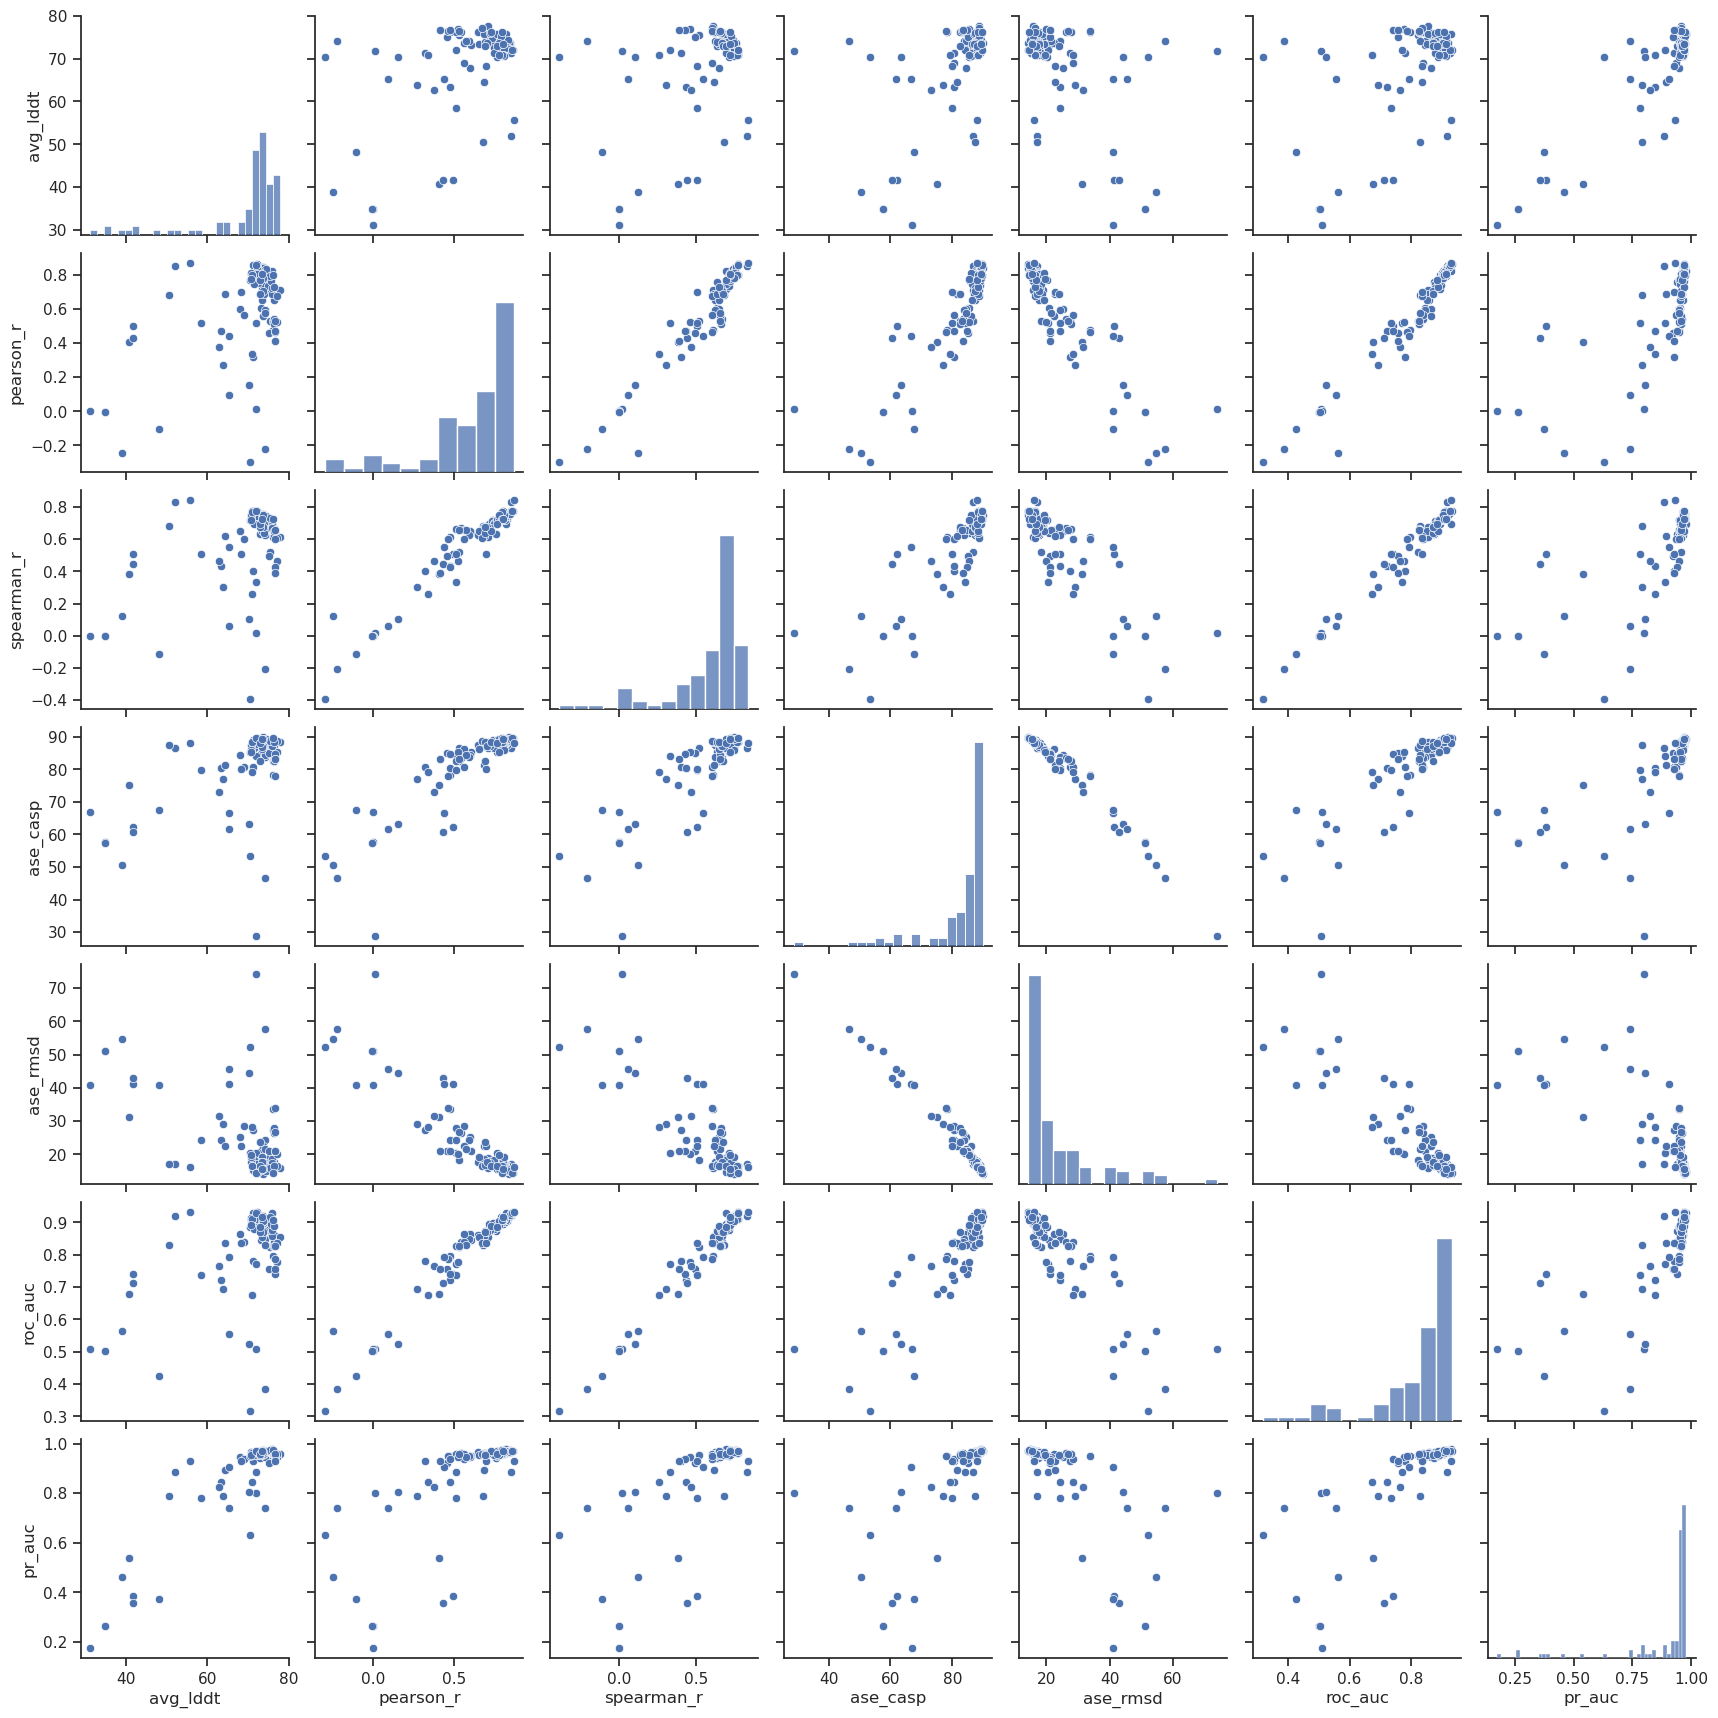

In [25]:
_ = sns.pairplot(data_to_plot)

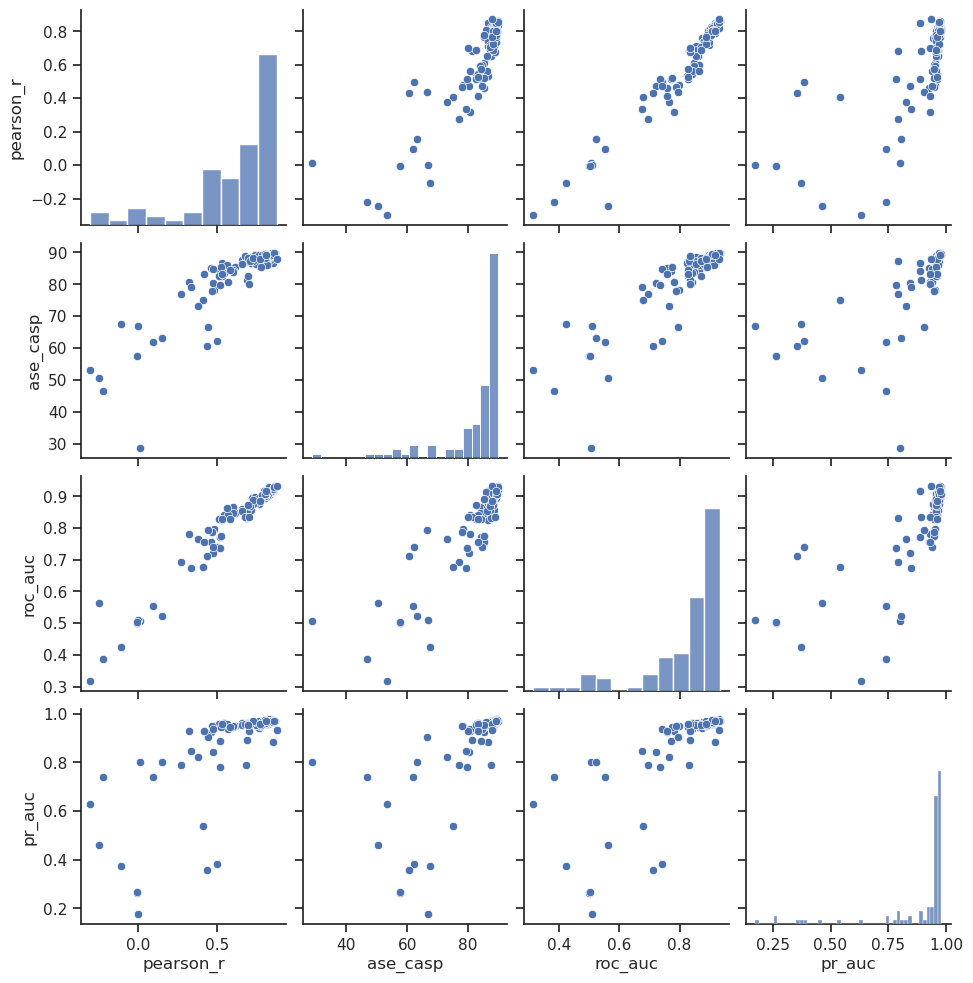

In [26]:
# reduce redundancy
sel_scores = ["pearson_r", "ase_casp", "roc_auc", "pr_auc"]
_ = sns.pairplot(data_to_plot[sel_scores])

In [27]:
# top ones for each category
top_indices = data_to_plot[["avg_lddt"] + sel_scores].idxmax().unique().tolist()
top_indices.append("270") # AF-vanilla
data_to_plot.loc[top_indices]

avg_lddt  pearson_r  spearman_r   ase_casp   ase_rmsd   roc_auc  \
group_id                                                                     
162       77.705385   0.709046    0.612081  88.486280  15.907175  0.855530   
478       55.611083   0.870503    0.843619  87.950002  16.060637  0.931569   
298       73.610205   0.839777    0.750581  89.888709  14.210031  0.920598   
446       72.060084   0.861831    0.777240  89.751925  14.331065  0.933096   
215       75.791619   0.821887    0.697007  89.251701  14.662649  0.929249   
270       73.716526   0.845552    0.759187  89.457151  14.578162  0.920864   

            pr_auc  
group_id            
162       0.956925  
478       0.931573  
298       0.970671  
446       0.971317  
215       0.978734  
270       0.972920

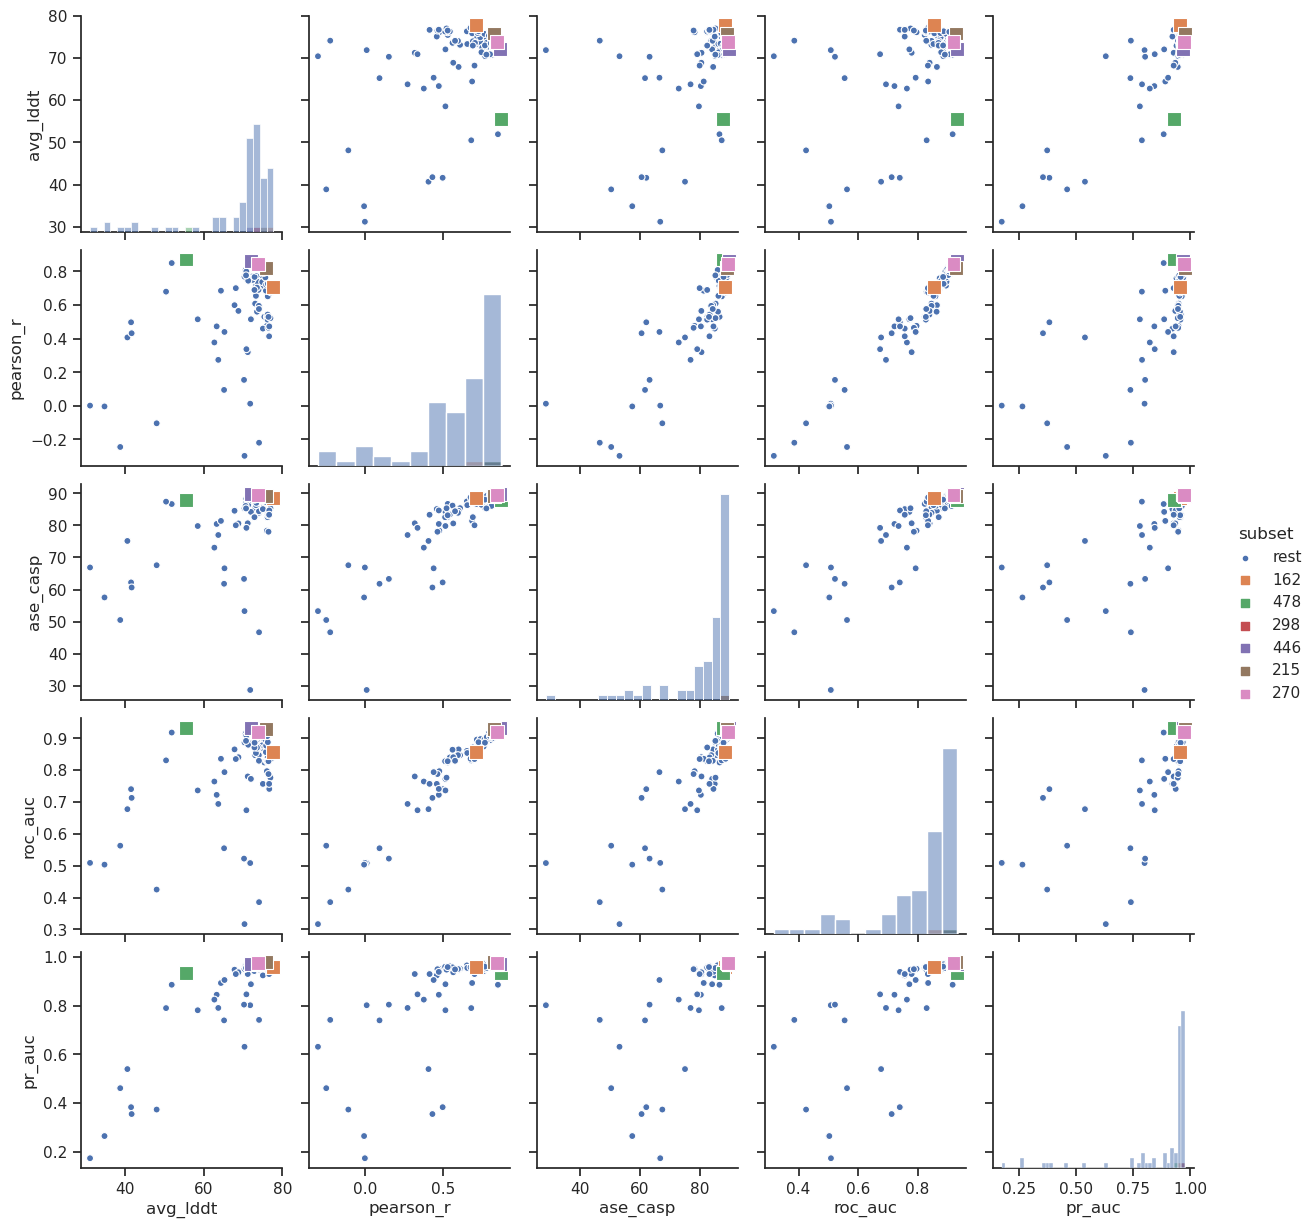

In [28]:
data_to_plot["subset"] = "rest"
for idx in top_indices:
    data_to_plot.loc[idx, "subset"] = idx
# rearrange data for nicer plot
subset_mask = data_to_plot.subset == "rest"
data_to_plot = pd.concat([data_to_plot[subset_mask],
                          data_to_plot.loc[top_indices]])
columns = ["avg_lddt"] + sel_scores + ["subset"]
markers = ["."] + [","] * len(top_indices)
_ = sns.pairplot(data_to_plot[columns],
                 hue="subset", markers=markers,
                 diag_kind="hist",
                 plot_kws=dict(s=100))

In [29]:
_ = sns.pairplot(data_to_plot[columns],
                 x_vars=sel_scores, y_vars=["avg_lddt"],
                 hue="subset", markers=markers,
                 diag_kind="hist",
                 plot_kws=dict(s=100))

## pairwise lDDT scatter plot for selected groups

In [30]:
# pick group to show pred. lDDT vs lDDT
def _scatter_group(group_id):
    sub_df1 = df1[df1.group_id == group_id]
    lddt_ref = np.concatenate(sub_df1.matched_lddts_ref.to_list())
    lddt_mdl = np.concatenate(sub_df1.matched_lddts_mdl.to_list())
    ax = sns.histplot(x=lddt_mdl, y=lddt_ref)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    plt.xlabel("pred. lDDT")
    plt.ylabel("actual lDDT")
    _ = sns.jointplot(x=lddt_mdl, y=lddt_ref, kind="kde", xlim=(0,100), ylim=(0,100))
    plt.xlabel("pred. lDDT")
    plt.ylabel("actual lDDT")

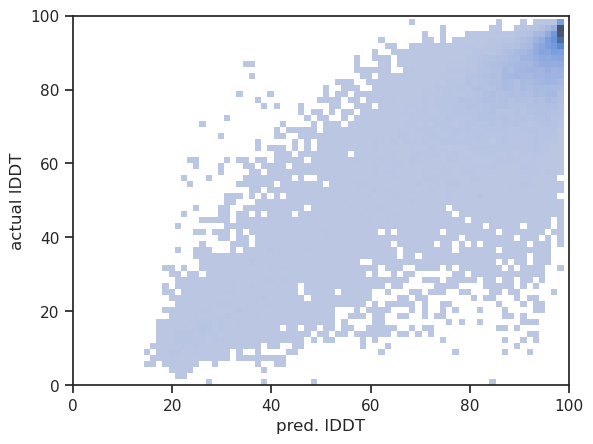

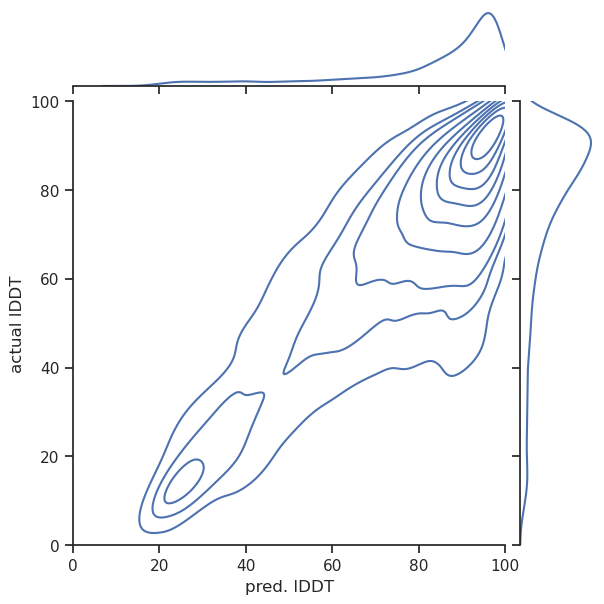

In [31]:
# AF-vanilla
_scatter_group("270")

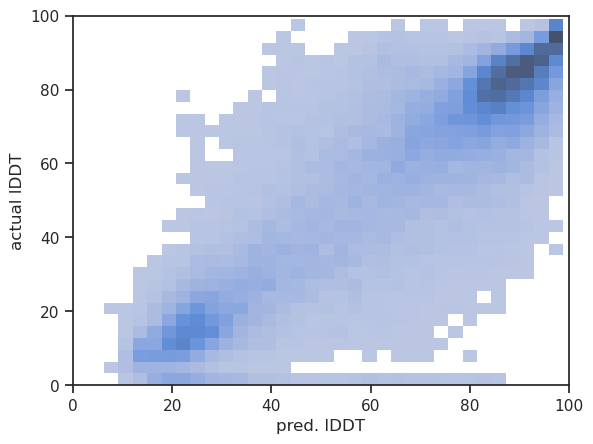

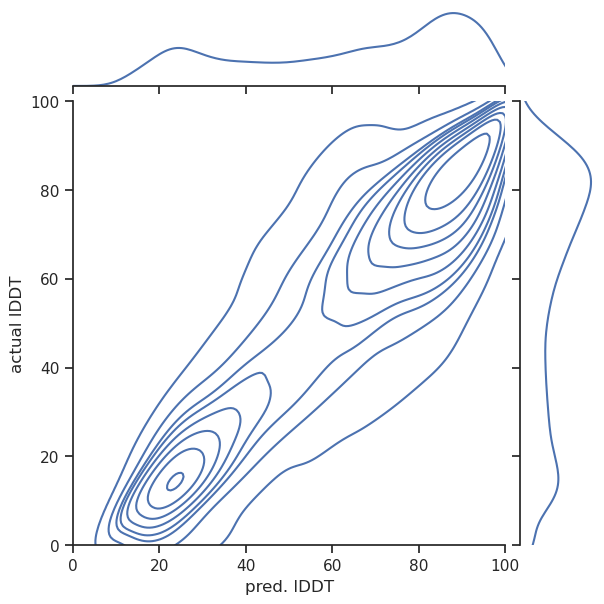

In [32]:
# top correlation (but poor avg. lDDT)
_scatter_group("478")
# NOTE: some spectacularly clashing structures from 478! (lDDT == 0)

In [33]:
# check targets with lots of 0s
sub_df1 = df1[df1.group_id == "478"].copy()
sub_df1["num_0"] = sub_df1.matched_lddts_ref.apply(lambda x: x.count(0))
sub_df1["avg_lddt_ref"] = sub_df1.matched_lddts_ref.apply(np.mean)
sub_df1["avg_lddt_mdl"] = sub_df1.matched_lddts_mdl.apply(np.mean)
sub_df1[["trg_name", "num_0", "q_prob_indices", "avg_lddt_ref",
         "avg_lddt_mdl"] + my_scores].sort_values("num_0", ascending=False).head()

trg_name  num_0 q_prob_indices  avg_lddt_ref  avg_lddt_mdl  pearson_r  \
25627    T1169    401             []     39.290895     55.777146   0.723783   
20691    T1154    162             []     10.203750     17.261606   0.166183   
21616  T1157s1     16             []     37.982321     48.318819   0.926481   
18723    T1150     10             []     50.525043     61.230143   0.884924   
25258    T1165      6             []     68.490766     75.689083   0.701603   

       spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  
25627    0.696670  81.521869  24.536000  0.851114  0.660482  
20691    0.103467  91.309990  10.684324       NaN       NaN  
21616    0.914175  88.543978  13.961242  0.962958  0.884875  
18723    0.882252  87.949341  15.328949  0.927204  0.896262  
25258    0.621207  89.871783  14.342556  0.820289  0.917328

In [34]:
# performance if one ignores the 0s? still meh...
lddt_ref = np.concatenate(sub_df1.matched_lddts_ref.to_list())
lddt_ref[lddt_ref.nonzero()].mean()

56.83543404087203

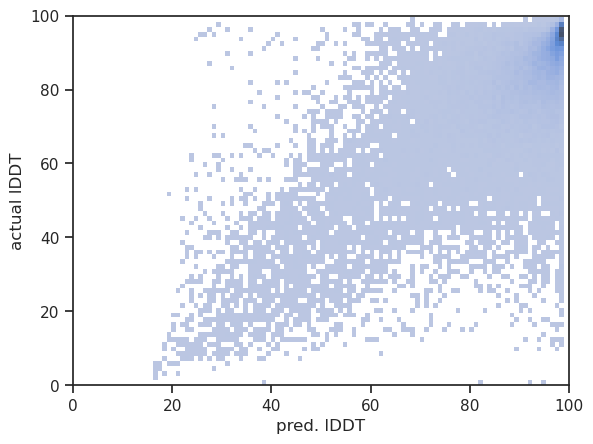

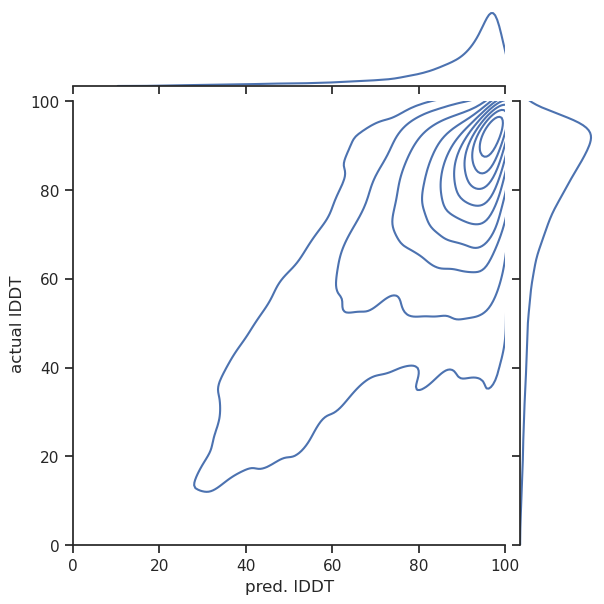

In [35]:
# top lDDT
_scatter_group("162")

## check different lDDT cutoffs

In [36]:
dfs_test = dfpg_tot[dfpg_tot.trg_count > max_trg_count * 0.8].copy()
for idx in dfs_test.index:
    sub_df1 = df1[df1.group_id == idx]
    lddt_ref = np.concatenate(sub_df1.matched_lddts_ref.to_list())
    lddt_mdl = np.concatenate(sub_df1.matched_lddts_mdl.to_list())
    for lddt_cutoff in [50, 70, 80]:
        scores = _calc_scores(lddt_ref, lddt_mdl, lddt_cutoff)
        for key in ["roc_auc", "pr_auc", "ratio_good", "ratio_bad"]:
            dfs_test.at[idx, f"{key}_{lddt_cutoff}"] = scores[key]

In [37]:
cols_to_rank = [(key + suffix) for suffix in ["", "_50", "_70", "_80"] \
                for key in ["roc_auc", "pr_auc"]]
dfs_test_ranks = dfs_test[cols_to_rank].rank(ascending=False, method="min").astype(int)
dfs_test = dfs_test.join(dfs_test_ranks, rsuffix="_rank")

In [38]:
for key in ["roc_auc", "pr_auc"]:
    print(key)
    cols = ["trg_count", "num_matched", "num_q_prob", "avg_lddt"]
    for suffix in ["_50", "", "_70", "_80"]:
        cols.extend([key + suffix, key + suffix + "_rank", "ratio_bad" + suffix])
    display(dfs_test[cols].sort_values(key, ascending=False).head(10))

roc_auc


trg_count  num_matched  num_q_prob   avg_lddt  roc_auc_50  \
group_id                                                              
446              77        28456          17  72.060084    0.950460   
478              77        28456           3  55.611083    0.948316   
461              77        28456          17  72.028140    0.947480   
245              77        28456         103  71.261346    0.943509   
131              77        28456          26  71.312180    0.942955   
385              74        27380         102  72.130897    0.939815   
270              77        28456          21  73.716526    0.937147   
298              77        28456          33  73.610205    0.938964   
123              64        19153          67  51.934575    0.928920   
353              77        26552           0  75.306701    0.933097   

          roc_auc_50_rank  ratio_bad_50   roc_auc  roc_auc_rank  ratio_bad  \
group_id                                                                     
446                     1      0.190294  0.933096             1   0.243956   
478                     2      0.384629  0.931569             2   0.467213   
461                     3      0.190153  0.929005             3   0.244131   
245                     4      0.194897  0.928210             4   0.256080   
131                     5      0.197814  0.926931             5   0.256396   
385                     6      0.181738  0.923796             6   0.241344   
270                     8      0.152235  0.920864             7   0.210922   
298                     7      0.160599  0.920598             8   0.216580   
123                    15      0.422440  0.918045             9   0.550619   
353                     9      0.138822  0.915870            10   0.190381   

          roc_auc_70  roc_auc_70_rank  ratio_bad_70  roc_auc_80  \
group_id                                                          
446         0.905715                2      0.328402    0.869705   
478         0.907835                1      0.586871    0.883671   
461         0.902894                4      0.328437    0.871239   
245         0.904421                3      0.346078    0.866666   
131         0.899560                5      0.340701    0.860295   
385         0.898859                6      0.330606    0.859780   
270         0.897088                7      0.304435    0.862831   
298         0.892697               10      0.305454    0.856199   
123         0.894055                8      0.712787    0.870227   
353         0.886886               18      0.273388    0.849840   

          roc_auc_80_rank  ratio_bad_80  
group_id                                 
446                     6      0.478493  
478                     1      0.756431  
461                     2      0.478985  
245                     7      0.497224  
131                     9      0.495115  
385                    11      0.484953  
270                     8      0.469426  
298                    18      0.465526  
123                     5      0.882995  
353                    26      0.435447

pr_auc


trg_count  num_matched  num_q_prob   avg_lddt  pr_auc_50  \
group_id                                                             
466              75        26984           4  76.173053   0.986755   
353              77        26552           0  75.306701   0.985727   
270              77        28456          21  73.716526   0.985201   
446              77        28456          17  72.060084   0.984467   
037              77        28456          12  74.636328   0.983313   
320              65        24945          10  75.691167   0.983847   
298              77        28456          33  73.610205   0.984296   
481              75        28063           9  73.438530   0.983667   
342              77        28456          22  74.330553   0.983516   
461              77        28456          17  72.028140   0.983748   

          pr_auc_50_rank  ratio_bad_50    pr_auc  pr_auc_rank  ratio_bad  \
group_id                                                                   
466                    1      0.114920  0.974894            1   0.170546   
353                    2      0.138822  0.974232            2   0.190381   
270                    3      0.152235  0.972920            3   0.210922   
446                    4      0.190294  0.971317            4   0.243956   
037                   10      0.142220  0.971229            5   0.193070   
320                    6      0.128683  0.971140            6   0.179796   
298                    5      0.160599  0.970671            7   0.216580   
481                    8      0.154723  0.970529            8   0.214838   
342                    9      0.147245  0.970501            9   0.205616   
461                    7      0.190153  0.969876           10   0.244131   

          pr_auc_70  pr_auc_70_rank  ratio_bad_70  pr_auc_80  pr_auc_80_rank  \
group_id                                                                       
466        0.944050               2      0.262637   0.857323               4   
353        0.944405               1      0.273388   0.858057               3   
270        0.943121               4      0.304435   0.856262               5   
446        0.939559               7      0.328402   0.856260               6   
037        0.940457               5      0.276321   0.851900               8   
320        0.943514               3      0.264422   0.872267               1   
298        0.937714              10      0.305454   0.848374              15   
481        0.937076              11      0.306810   0.839953              24   
342        0.940072               6      0.297477   0.854958               7   
461        0.939460               8      0.328437   0.862638               2   

          ratio_bad_80  
group_id                
466           0.437667  
353           0.435447  
270           0.469426  
446           0.478493  
037           0.437764  
320           0.432111  
298           0.465526  
481           0.471511  
342           0.459235  
461           0.478985

In [39]:
cols_to_show = [("roc_auc" + suffix) for suffix in ["_50", "", "_70", "_80"]]
_ = sns.pairplot(dfs_test[cols_to_show])

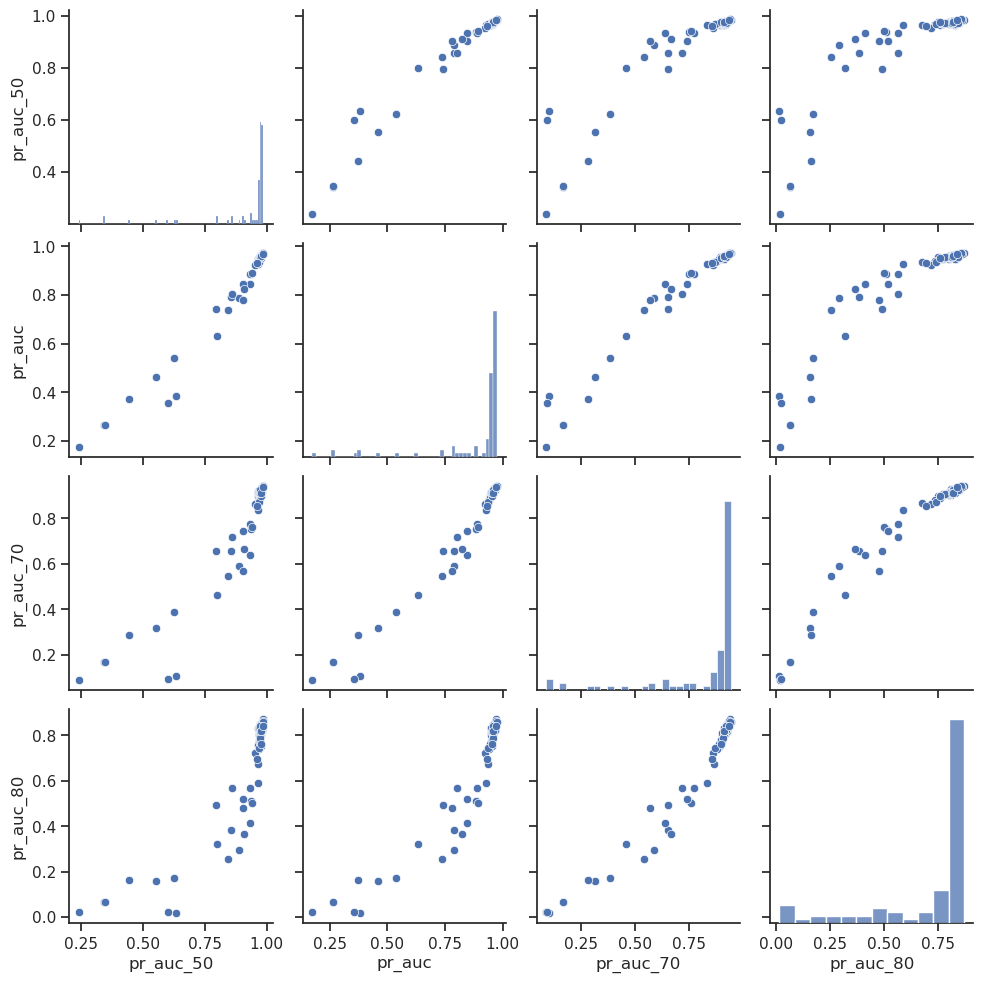

In [40]:
cols_to_show = [("pr_auc" + suffix) for suffix in ["_50", "", "_70", "_80"]]
_ = sns.pairplot(dfs_test[cols_to_show])

**FAZIT**: easier to get higher PR AUC with lower lDDT cutoff but ranking at top seems stable enough

## combined scores

In [41]:
def _prep_df(df, sel_scores, trg_count_cutoff=(max_trg_count * 0.8)):
    # keep only groups with enough targets
    df = df[df.trg_count > trg_count_cutoff].copy()
    # apply group names
    df = df.reset_index()
    df["group_name"] = df["group_id"].apply(lambda x: grp_names[x])
    df = df.set_index("group_name")
    # get combo score for all
    df["combo_score"] = df[sel_scores].sum(axis=1)
    # return sorted
    return df.sort_values("combo_score", ascending=False)

In [42]:
# combined score on per-target-averages?
dfpg["avg_ase_casp_01"] = dfpg["avg_ase_casp"] / 100
sel_scores = ["avg_pearson_r", "avg_ase_casp_01", "avg_roc_auc", "avg_pr_auc"]
dfs_pt = _prep_df(dfpg, sel_scores)
dfs_pt[["trg_count", "num_matched"] + sel_scores + ["combo_score"]].head(10)

trg_count  num_matched  avg_pearson_r  avg_ase_casp_01  \
group_name                                                                    
NBIS-AF2-standard           77        28456       0.631725         0.891313   
Agemo                       77        28456       0.684161         0.880781   
server_125                  77        28456       0.614819         0.885530   
hFold_human                 77        28456       0.610272         0.891378   
server_122                  77        28456       0.613473         0.885127   
ESM-single-sequence         70        20763       0.649464         0.858604   
server_123                  77        28456       0.619019         0.882793   
RaptorX                     77        28456       0.614810         0.876917   
hks1988                     77        28456       0.620259         0.886137   
ChaePred                    76        28097       0.614038         0.886950   

                     avg_roc_auc  avg_pr_auc  combo_score  
group_name                                                 
NBIS-AF2-standard       0.886420    0.945055     3.354513  
Agemo                   0.890034    0.880571     3.335547  
server_125              0.884064    0.947706     3.332119  
hFold_human             0.879431    0.949695     3.330775  
server_122              0.883384    0.946487     3.328472  
ESM-single-sequence     0.881885    0.937519     3.327470  
server_123              0.879076    0.942553     3.323442  
RaptorX                 0.879223    0.952066     3.323015  
hks1988                 0.878078    0.933451     3.317925  
ChaePred                0.868890    0.944636     3.314514

In [43]:
ax = dfs_pt.head(20)[sel_scores].plot(kind="barh", stacked=True)
ax.invert_yaxis()
ax.legend(loc='lower right', labels=["Pearson's r", "ASE/100", "ROC AUC", "PR AUC"])
_ = plt.ylabel("score (each scaled to [0,1])", fontsize=14)
plt.savefig("./plot_ts_qe_top_20_pt.png", dpi=300, bbox_inches='tight')

In [44]:
# combined score on combined data
dfpg_tot["ase_casp_01"] = dfpg_tot["ase_casp"] / 100
sel_scores = ["pearson_r", "ase_casp_01", "roc_auc", "pr_auc"]
dfs = _prep_df(dfpg_tot, sel_scores)
dfs[["trg_count", "num_matched", "avg_lddt"] + sel_scores + ["combo_score"]].head(20)
# NOTE: had also tried "trg_count > max_trg_count/2" and
#       "num_matched > dfpg_tot.num_matched.max() * 0.8"
#       instead of "trg_count > max_trg_count * 0.8"

trg_count  num_matched   avg_lddt  pearson_r  \
group_name                                                          
ColabFold                   77        28456  72.060084   0.861831   
colabfold_human             77        28456  72.028140   0.855859   
FoldEver                    77        28456  71.261346   0.854515   
NBIS-AF2-standard           77        28456  73.716526   0.845552   
MUFold                      77        28456  73.610205   0.839777   
FoldEver-Hybrid             74        27380  72.130897   0.845716   
Kiharalab_Server            77        28456  71.312180   0.842866   
Agemo                       77        28456  55.611083   0.870503   
hFold_human                 77        28456  74.330553   0.833403   
hks1988                     77        28456  72.619994   0.829441   
Wallner                     77        28456  74.636328   0.821544   
GinobiFold-SER              76        27422  71.584102   0.829796   
ShanghaiTech-TS-SER         76        27422  71.909904   0.827000   
GuijunLab-Meta              75        28063  73.438530   0.803392   
server_124                  77        28456  72.724912   0.818357   
Shennong                    75        26984  76.173053   0.798569   
server_123                  77        28456  72.523104   0.824918   
hFold                       77        26552  75.306701   0.791395   
UltraFold_Server            77        28456  72.148825   0.807609   
TRFold                      76        28233  71.194954   0.816764   

                     ase_casp_01   roc_auc    pr_auc  combo_score  
group_name                                                         
ColabFold               0.897519  0.933096  0.971317     3.663763  
colabfold_human         0.896712  0.929005  0.969876     3.651452  
FoldEver                0.890277  0.928210  0.967517     3.640519  
NBIS-AF2-standard       0.894572  0.920864  0.972920     3.633908  
MUFold                  0.898887  0.920598  0.970671     3.629933  
FoldEver-Hybrid         0.891892  0.923796  0.967673     3.629078  
Kiharalab_Server        0.889696  0.926931  0.966555     3.626047  
Agemo                   0.879500  0.931569  0.931573     3.613144  
hFold_human             0.892151  0.913706  0.970501     3.609761  
hks1988                 0.890034  0.913474  0.968338     3.601288  
Wallner                 0.888640  0.911138  0.971229     3.592550  
GinobiFold-SER          0.875256  0.913750  0.966355     3.585157  
ShanghaiTech-TS-SER     0.876134  0.913904  0.966464     3.583502  
GuijunLab-Meta          0.891837  0.915731  0.970529     3.581488  
server_124              0.885354  0.908271  0.968554     3.580536  
Shennong                0.895839  0.906808  0.974894     3.576109  
server_123              0.880943  0.903696  0.962226     3.571782  
hFold                   0.887388  0.915870  0.974232     3.568885  
UltraFold_Server        0.881149  0.912311  0.966385     3.567454  
TRFold                  0.878099  0.910783  0.959990     3.565636

In [48]:
# from GS: stolen from http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
ax = dfs.head(20)[sel_scores].plot(kind="barh", stacked=True, width=0.85,
                                   linewidth=1.0, edgecolor='k', color=colors)
ax.invert_yaxis()
ax.set_xlim([0, 4])
ax.legend(loc='lower right', labels=["Pearson's r", "ASE/100", "ROC AUC", "PR AUC"])
plt.title("Single chain self-assessment top-20", fontsize="x-large")
_ = plt.xlabel("score (each scaled to [0,1])", fontsize="large")
_ = plt.ylabel("", fontsize="large")
plt.savefig("./plot_ts_qe_top_20.png", dpi=300, bbox_inches='tight')

In [49]:
# ranges (note: one outlier on avg. lDDT; rest all about the same)
top_dfs = dfs.head(20)
top_dfs.trg_count.min(), top_dfs.trg_count.max(), \
top_dfs.num_matched.min(), top_dfs.num_matched.max(), \
sorted(top_dfs.avg_lddt)[:2], top_dfs.avg_lddt.max()

(74,
 77,
 26552,
 28456,
 [55.61108342704527, 71.19495377749442],
 76.17305329083901)

In [50]:
# how are top lDDT groups doing?
dfs[["trg_count", "num_matched", "avg_lddt"] + sel_scores + ["combo_score"]] \
    .sort_values("avg_lddt", ascending=False).head(20)

trg_count  num_matched   avg_lddt  pearson_r  ase_casp_01  \
group_name                                                                   
UM-TBM                  77        28456  77.705385   0.709046     0.884863   
PEZYFoldings            76        27828  77.111975   0.674925     0.887100   
Yang-Server             77        28232  76.970698   0.521711     0.853210   
Yang                    77        28109  76.678054   0.472338     0.846409   
MULTICOM                77        28456  76.482826   0.463894     0.780040   
MULTICOM_refine         77        28456  76.480361   0.528980     0.831451   
DFolding                77        28456  76.289900   0.651326     0.874500   
MULTICOM_egnn           77        28456  76.260101   0.542761     0.833598   
MULTICOM_deep           77        28456  76.257987   0.512586     0.825414   
Shennong                75        26984  76.173053   0.798569     0.895839   
MULTICOM_human          77        28456  76.076450   0.475748     0.783357   
MULTICOM_qa             77        28456  76.076133   0.528906     0.826162   
DFolding-server         77        28456  75.877274   0.720422     0.872721   
Asclepius               76        27996  75.819755   0.685069     0.871271   
Elofsson                65        24945  75.691167   0.763694     0.890575   
bench                   76        27763  75.426256   0.529482     0.866875   
hFold                   77        26552  75.306701   0.791395     0.887388   
BAKER                   77        28447  75.057099   0.459380     0.850700   
Agemo_mix               77        28456  75.020005   0.712856     0.866418   
B11L                    73        26376  74.883652   0.736474     0.882430   

                  roc_auc    pr_auc  combo_score  
group_name                                        
UM-TBM           0.855530  0.956925     3.406364  
PEZYFoldings     0.835777  0.956456     3.354258  
Yang-Server      0.776365  0.946828     3.098113  
Yang             0.740973  0.937678     2.997398  
MULTICOM         0.787689  0.948668     2.980291  
MULTICOM_refine  0.827930  0.957488     3.145849  
DFolding         0.860197  0.964243     3.350266  
MULTICOM_egnn    0.839790  0.960491     3.176641  
MULTICOM_deep    0.827938  0.958542     3.124480  
Shennong         0.906808  0.974894     3.576109  
MULTICOM_human   0.796688  0.950225     3.006019  
MULTICOM_qa      0.827741  0.956321     3.139131  
DFolding-server  0.877092  0.966161     3.436395  
Asclepius        0.856496  0.962031     3.374868  
Elofsson         0.896171  0.971140     3.521580  
bench            0.824015  0.954574     3.174945  
hFold            0.915870  0.974232     3.568885  
BAKER            0.756791  0.923294     2.990165  
Agemo_mix        0.869333  0.963049     3.411655  
B11L             0.877763  0.964258     3.460924

In [51]:
# what about tha z-scores?
zscores = dfs[sel_scores].apply(zscore)
zscores["combo_zscore"] = zscores[sel_scores].sum(axis=1)
zscores["combo_rank"] = zscores["combo_zscore"].rank(ascending=False, method="min").astype(int)
zscores[["combo_rank", "combo_zscore"] + sel_scores].head(20)

combo_rank  combo_zscore  pearson_r  ase_casp_01  \
group_name                                                              
ColabFold                     1      2.980918   0.926692     0.724021   
colabfold_human               2      2.911952   0.904759     0.715740   
FoldEver                      3      2.821921   0.899820     0.649749   
NBIS-AF2-standard             5      2.807954   0.866904     0.693793   
MUFold                        4      2.816477   0.845695     0.738048   
FoldEver-Hybrid               6      2.773889   0.867506     0.666320   
Kiharalab_Server              7      2.758208   0.857038     0.643790   
Agemo                        10      2.595206   0.958538     0.539237   
hFold_human                   8      2.671275   0.822285     0.668968   
hks1988                       9      2.621236   0.807735     0.647263   
Wallner                      11      2.576478   0.778730     0.632961   
GinobiFold-SER               17      2.462018   0.809036     0.495715   
ShanghaiTech-TS-SER          16      2.462519   0.798770     0.504718   
GuijunLab-Meta               12      2.573198   0.712063     0.665747   
server_124                   15      2.494650   0.767026     0.599265   
Shennong                     13      2.553806   0.694352     0.706786   
server_123                   19      2.403909   0.791120     0.554032   
hFold                        14      2.505181   0.668005     0.620125   
UltraFold_Server             18      2.430326   0.727554     0.556152   
TRFold                       22      2.385580   0.761176     0.524864   

                      roc_auc    pr_auc  
group_name                               
ColabFold            0.837619  0.492585  
colabfold_human      0.806893  0.484560  
FoldEver             0.800925  0.471427  
NBIS-AF2-standard    0.745746  0.501512  
MUFold               0.743745  0.488989  
FoldEver-Hybrid      0.767767  0.472297  
Kiharalab_Server     0.791312  0.466069  
Agemo                0.826149  0.271282  
hFold_human          0.691981  0.488042  
hks1988              0.690239  0.475999  
Wallner              0.672690  0.492097  
GinobiFold-SER       0.692311  0.464956  
ShanghaiTech-TS-SER  0.693470  0.465561  
GuijunLab-Meta       0.707191  0.488197  
server_124           0.651156  0.477202  
Shennong             0.640167  0.512501  
server_123           0.616793  0.441963  
hFold                0.708237  0.508815  
UltraFold_Server     0.681498  0.465123  
TRFold               0.670027  0.429513

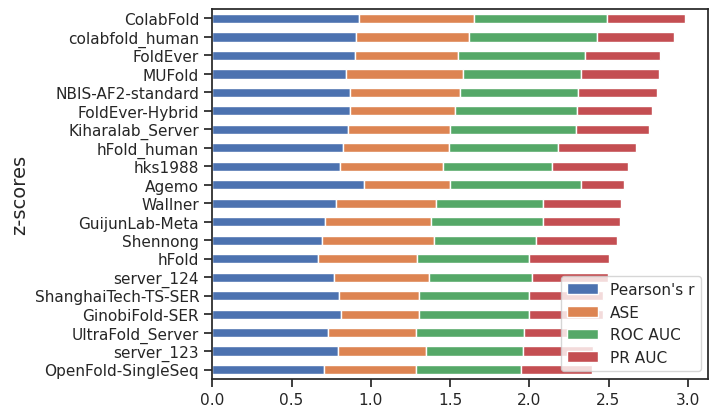

In [52]:
zscores_ranked = zscores.sort_values("combo_zscore", ascending=False)
ax = zscores_ranked.head(20)[sel_scores].plot(kind="barh", stacked=True)
ax.invert_yaxis()
ax.legend(loc='lower right', labels=["Pearson's r", "ASE", "ROC AUC", "PR AUC"])
_ = plt.ylabel("z-scores", fontsize=14)
plt.savefig("./plot_ts_qe_top_20_z.png", dpi=300, bbox_inches='tight')

avg_lddt  pearson_r  ase_casp_01   roc_auc    pr_auc  \
group_name                                                                 
UM-TBM             77.705385   0.709046     0.884863  0.855530  0.956925   
Agemo              55.611083   0.870503     0.879500  0.931569  0.931573   
MUFold             73.610205   0.839777     0.898887  0.920598  0.970671   
ColabFold          72.060084   0.861831     0.897519  0.933096  0.971317   
Shennong           76.173053   0.798569     0.895839  0.906808  0.974894   
NBIS-AF2-standard  73.716526   0.845552     0.894572  0.920864  0.972920   

                   combo_score  
group_name                      
UM-TBM                3.406364  
Agemo                 3.613144  
MUFold                3.629933  
ColabFold             3.663763  
Shennong              3.576109  
NBIS-AF2-standard     3.633908

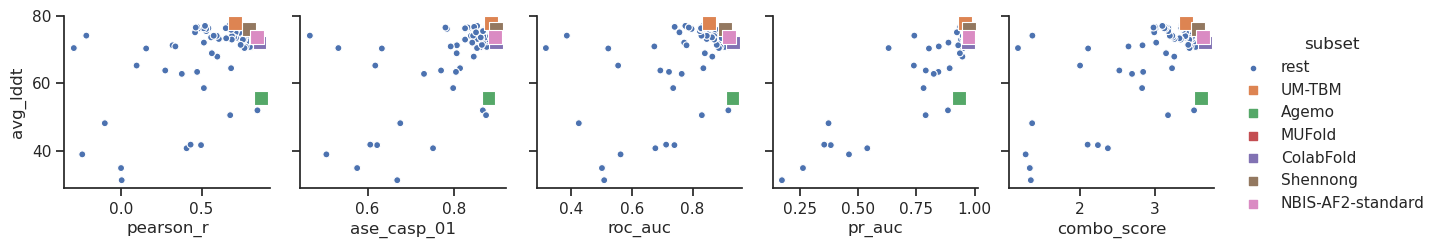

In [53]:
# plot lDDT vs selected scores and mark top groups (i.e. max on one of scores)
sel_scores = ["pearson_r", "ase_casp_01", "roc_auc", "pr_auc", "combo_score"]
# mark selected ones
data_to_plot = dfs[["avg_lddt"] + sel_scores].copy()
top_indices = data_to_plot.idxmax().unique().tolist()
top_indices.append(grp_names["270"]) # AF-vanilla
display(data_to_plot.loc[top_indices])
data_to_plot["subset"] = "rest"
for idx in top_indices:
    data_to_plot.loc[idx, "subset"] = idx
# rearrange data for nicer plot
subset_mask = data_to_plot.subset == "rest"
data_to_plot = pd.concat([data_to_plot[subset_mask],
                          data_to_plot.loc[top_indices]])
columns = ["avg_lddt"] + sel_scores + ["subset"]
markers = ["."] + [","] * len(top_indices)
_ = sns.pairplot(data_to_plot[columns],
                 x_vars=sel_scores, y_vars=["avg_lddt"],
                 hue="subset", markers=markers,
                 diag_kind="hist",
                 plot_kws=dict(s=100))
plt.savefig("./plot_ts_lddt_vs_scores.png", dpi=300, bbox_inches='tight')

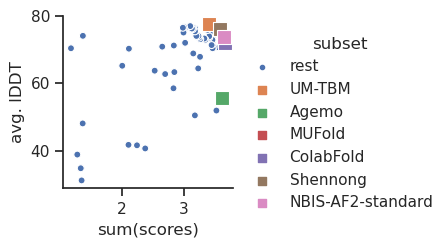

In [54]:
_ = sns.pairplot(data_to_plot[columns],
                 x_vars=["combo_score"], y_vars=["avg_lddt"],
                 hue="subset", markers=markers,
                 diag_kind="hist",
                 plot_kws=dict(s=100))
_ = plt.xlabel("sum(scores)")
_ = plt.ylabel("avg. lDDT")
plt.savefig("./paper_plot_ts_lddt_vs_sum_scores.png", dpi=300, bbox_inches='tight')

In [55]:
# wall of shame
rev_grp_names = {v:k for k, v in grp_names.items()}
print("AL", data_to_plot.avg_lddt.quantile([0.25, 0.5, 0.75]).tolist(),
      data_to_plot.avg_lddt.loc[grp_names["270"]])
print("CS", data_to_plot.combo_score.quantile([0.25, 0.5, 0.75]).tolist())
al_quan = 70  #data_to_plot.avg_lddt.quantile(0.6)
cs_quan = 2.9 #data_to_plot.combo_score.quantile(0.25)
tst = data_to_plot[(data_to_plot.avg_lddt > al_quan) & \
                   (data_to_plot.combo_score < cs_quan)].sort_values("combo_score").copy()
tst["group_id"] = pd.Series(tst.index, index=tst.index).apply(lambda x: rev_grp_names[x])
tst

AL [70.69128933297377, 72.58719335813214, 74.26919460051046] 73.71652586449255
CS [3.03682054527845, 3.4090096158913723, 3.5542349616898647]


avg_lddt  pearson_r  ase_casp_01   roc_auc    pr_auc  \
group_name                                                               
Seder2022easy    70.395489  -0.297860     0.532711  0.316490  0.630969   
Seder2022hard    74.085118  -0.219695     0.466773  0.385475  0.741067   
FTBiot0119       70.274518   0.154129     0.633123  0.522204  0.803608   
Bhattacharya     70.877214   0.336805     0.792177  0.674013  0.845724   
DFolding-refine  71.212482   0.319060     0.806451  0.780128  0.928955   

                 combo_score subset group_id  
group_name                                    
Seder2022easy       1.182311   rest      455  
Seder2022hard       1.373620   rest      216  
FTBiot0119          2.113063   rest      165  
Bhattacharya        2.648719   rest      275  
DFolding-refine     2.834594   rest      073

In [56]:
# check manually
# df1[df1.group_id == "003"]
# df1[(df1.group_id == "003") & (df1.pearson_r < 0.1)]
df1[df1.group_id == "216"][["trg_name", "num_q_prob",
                            "lddt_mdl_max", "pearson_r", "avg_lddt"]] \
   .sort_values("pearson_r")#.head(20)

trg_name  num_q_prob  lddt_mdl_max  pearson_r   avg_lddt
21351  T1157s1           0         25.90  -0.559688  62.753710
8061     T1124           0         28.20  -0.492372  79.164127
33431    T1187           0         25.27  -0.474541  83.715732
27302    T1175           0         32.26  -0.450523  80.119545
35807    T1197           1         24.44  -0.445289  74.173531
...        ...         ...           ...        ...        ...
172      T1104           1         25.95  -0.004577  68.648376
14950  T1137s6           1         26.84   0.018555  77.932581
20472    T1154           1         43.70   0.063386  33.301595
23200    T1160           0         24.22   0.077283  66.795517
26329    T1173           4         32.23   0.169469  41.179412

[71 rows x 5 columns]

## check single target for top groups

In [57]:
[(x, rev_grp_names[x]) for x in top_indices]

[('UM-TBM', '162'),
 ('Agemo', '478'),
 ('MUFold', '298'),
 ('ColabFold', '446'),
 ('Shennong', '466'),
 ('NBIS-AF2-standard', '270')]

In [58]:
# possibly tricky target?
top_group_ids = [rev_grp_names[x] for x in top_indices]
df1[df1.trg_name.isin(["T1120", "T1170"]) & (df1.group_id.isin(top_group_ids))]\
     [['trg_name', 'group_id', 'pearson_r', 'ase_casp', 'roc_auc', 'pr_auc']]

trg_name group_id  pearson_r   ase_casp   roc_auc    pr_auc
6068     T1120      162   0.619252  86.717193  0.776208  0.976082
6188     T1120      270   0.660464  87.766140  0.735780  0.976275
6223     T1120      298   0.648403  87.586930  0.736697  0.976626
6331     T1120      446   0.651307  89.289254  0.698394  0.972507
6356     T1120      466   0.627410  87.503421  0.740367  0.977234
6367     T1120      478   0.758842  86.067719  0.896677  0.960310
25783    T1170      162   0.493901  93.161763  0.778135  0.999196
25901    T1170      270   0.497946  89.634583       NaN       NaN
25936    T1170      298   0.542838  93.898878  0.819936  0.999364
26080    T1170      446   0.526395  93.340256  0.996785  0.999990
26111    T1170      466   0.498118  90.086859       NaN       NaN
26123    T1170      478   0.530277  95.222340  0.975189  0.999754

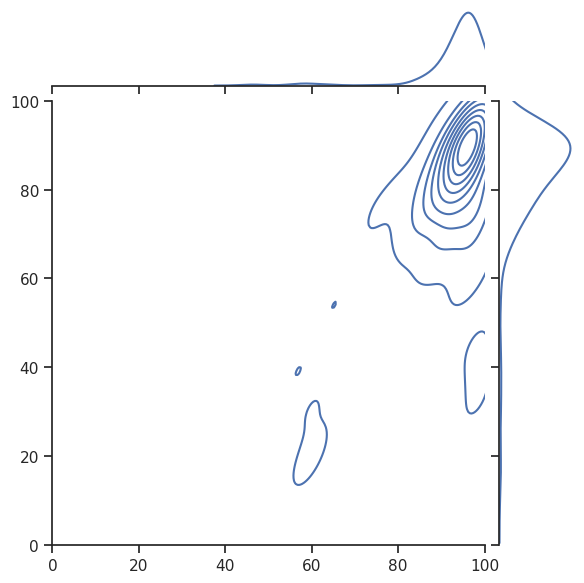

In [59]:
 _ = sns.jointplot(x=df1.loc[6331, "matched_lddts_mdl"],
                   y=df1.loc[6331, "matched_lddts_ref"],
                   kind="kde", xlim=(0,100), ylim=(0,100))

## check consensus scores (GLOBAL)

In [60]:
# group everything together
lddt_ref = np.concatenate(df1.matched_lddts_ref.to_list())
lddt_mdl = np.concatenate(df1.matched_lddts_base.to_list())
scores = _calc_scores(lddt_ref, lddt_mdl)
scores

{'pearson_r': 0.8328806095421559,
 'spearman_r': 0.7300669372931454,
 'ase_casp': 89.10167553846757,
 'ase_rmsd': 15.58224379544685,
 'roc_auc': 0.9192441904723141,
 'pr_auc': 0.9601297125569664,
 'ratio_good': 0.7312782479989337,
 'ratio_bad': 0.2687217520010663,
 'lddt_ref_min': 0.0,
 'lddt_ref_max': 99.71,
 'lddt_mdl_min': 0.0,
 'lddt_mdl_max': 98.63}

In [61]:
dfs_tst = dfs.copy()
sel_scores = ["pearson_r", "ase_casp_01", "roc_auc", "pr_auc"]
consensus_scores = [
    scores["pearson_r"],
    scores["ase_casp"] / 100,
    scores["roc_auc"],
    scores["pr_auc"]
]
dfs_tst.loc["Consensus", "trg_count"] = max_trg_count
dfs_tst.loc["Consensus", "num_matched"] = len(lddt_mdl)
dfs_tst.loc["Consensus", "avg_lddt"] = lddt_ref.mean()
dfs_tst.loc["Consensus", sel_scores] = consensus_scores
dfs_tst.loc["Consensus", "combo_score"] = sum(consensus_scores)
# resort them
dfs_tst = dfs_tst.sort_values("combo_score", ascending=False)
# get rank of Consensus
cons_rank = dfs_tst.index.get_loc("Consensus") + 1
print(cons_rank)
dfs_tst[["group_id", "trg_count", "num_matched", "avg_lddt"] \
        + sel_scores + ["combo_score"]].head(max(20, cons_rank))

10


group_id  trg_count  num_matched   avg_lddt  pearson_r  \
group_name                                                                   
ColabFold                446       77.0      28456.0  72.060084   0.861831   
colabfold_human          461       77.0      28456.0  72.028140   0.855859   
FoldEver                 245       77.0      28456.0  71.261346   0.854515   
NBIS-AF2-standard        270       77.0      28456.0  73.716526   0.845552   
MUFold                   298       77.0      28456.0  73.610205   0.839777   
FoldEver-Hybrid          385       74.0      27380.0  72.130897   0.845716   
Kiharalab_Server         131       77.0      28456.0  71.312180   0.842866   
Agemo                    478       77.0      28456.0  55.611083   0.870503   
hFold_human              342       77.0      28456.0  74.330553   0.833403   
Consensus                NaN       77.0    2723423.0  69.711606   0.832881   
hks1988                  354       77.0      28456.0  72.619994   0.829441   
Wallner                  037       77.0      28456.0  74.636328   0.821544   
GinobiFold-SER           011       76.0      27422.0  71.584102   0.829796   
ShanghaiTech-TS-SER      133       76.0      27422.0  71.909904   0.827000   
GuijunLab-Meta           481       75.0      28063.0  73.438530   0.803392   
server_124               383       77.0      28456.0  72.724912   0.818357   
Shennong                 466       75.0      26984.0  76.173053   0.798569   
server_123               018       77.0      28456.0  72.523104   0.824918   
hFold                    353       77.0      26552.0  75.306701   0.791395   
UltraFold_Server         125       77.0      28456.0  72.148825   0.807609   

                     ase_casp_01   roc_auc    pr_auc  combo_score  
group_name                                                         
ColabFold               0.897519  0.933096  0.971317     3.663763  
colabfold_human         0.896712  0.929005  0.969876     3.651452  
FoldEver                0.890277  0.928210  0.967517     3.640519  
NBIS-AF2-standard       0.894572  0.920864  0.972920     3.633908  
MUFold                  0.898887  0.920598  0.970671     3.629933  
FoldEver-Hybrid         0.891892  0.923796  0.967673     3.629078  
Kiharalab_Server        0.889696  0.926931  0.966555     3.626047  
Agemo                   0.879500  0.931569  0.931573     3.613144  
hFold_human             0.892151  0.913706  0.970501     3.609761  
Consensus               0.891017  0.919244  0.960130     3.603271  
hks1988                 0.890034  0.913474  0.968338     3.601288  
Wallner                 0.888640  0.911138  0.971229     3.592550  
GinobiFold-SER          0.875256  0.913750  0.966355     3.585157  
ShanghaiTech-TS-SER     0.876134  0.913904  0.966464     3.583502  
GuijunLab-Meta          0.891837  0.915731  0.970529     3.581488  
server_124              0.885354  0.908271  0.968554     3.580536  
Shennong                0.895839  0.906808  0.974894     3.576109  
server_123              0.880943  0.903696  0.962226     3.571782  
hFold                   0.887388  0.915870  0.974232     3.568885  
UltraFold_Server        0.881149  0.912311  0.966385     3.567454

In [62]:
ax = dfs_tst.head(20)[sel_scores].plot(kind="barh", stacked=True)
ax.invert_yaxis()
ax.legend(loc='lower right', labels=["Pearson's r", "ASE/100", "ROC AUC", "PR AUC"])
_ = plt.ylabel("score (each scaled to [0,1])", fontsize=14)
plt.savefig("./plot_ts_qe_top_20_cons.png", dpi=300, bbox_inches='tight')

In [63]:
# plot lDDT vs selected scores and mark top groups (i.e. max on one of scores)
sel_scores = ["pearson_r", "ase_casp_01", "roc_auc", "pr_auc", "combo_score"]
# mark selected ones
data_to_plot = dfs_tst[["avg_lddt"] + sel_scores].copy()
top_indices = data_to_plot.idxmax().unique().tolist()
top_indices.append(grp_names["270"]) # AF-vanilla
top_indices.append("Consensus")
display(data_to_plot.loc[top_indices])
data_to_plot["subset"] = "rest"
for idx in top_indices:
    data_to_plot.loc[idx, "subset"] = idx
# rearrange data for nicer plot
subset_mask = data_to_plot.subset == "rest"
data_to_plot = pd.concat([data_to_plot[subset_mask],
                          data_to_plot.loc[top_indices]])
columns = ["avg_lddt"] + sel_scores + ["subset"]
markers = ["."] + [","] * len(top_indices)
_ = sns.pairplot(data_to_plot[columns],
                 x_vars=sel_scores, y_vars=["avg_lddt"],
                 hue="subset", markers=markers,
                 diag_kind="hist",
                 plot_kws=dict(s=100))
plt.savefig("./plot_ts_lddt_vs_scores_cons.png", dpi=300, bbox_inches='tight')

avg_lddt  pearson_r  ase_casp_01   roc_auc    pr_auc  \
group_name                                                                 
UM-TBM             77.705385   0.709046     0.884863  0.855530  0.956925   
Agemo              55.611083   0.870503     0.879500  0.931569  0.931573   
MUFold             73.610205   0.839777     0.898887  0.920598  0.970671   
ColabFold          72.060084   0.861831     0.897519  0.933096  0.971317   
Shennong           76.173053   0.798569     0.895839  0.906808  0.974894   
NBIS-AF2-standard  73.716526   0.845552     0.894572  0.920864  0.972920   
Consensus          69.711606   0.832881     0.891017  0.919244  0.960130   

                   combo_score  
group_name                      
UM-TBM                3.406364  
Agemo                 3.613144  
MUFold                3.629933  
ColabFold             3.663763  
Shennong              3.576109  
NBIS-AF2-standard     3.633908  
Consensus             3.603271

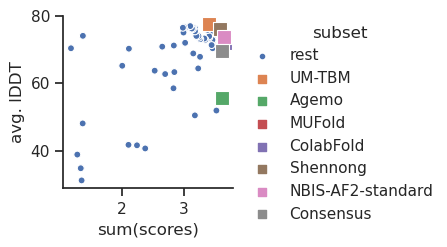

In [64]:
_ = sns.pairplot(data_to_plot[columns],
                 x_vars=["combo_score"], y_vars=["avg_lddt"],
                 hue="subset", markers=markers,
                 diag_kind="hist",
                 plot_kws=dict(s=100))
_ = plt.xlabel("sum(scores)")
_ = plt.ylabel("avg. lDDT")
plt.savefig("./plot_ts_lddt_vs_sum_scores_cons.png", dpi=300, bbox_inches='tight')

## check consensus scores (per group)

In [65]:
dfs_tst = dfs.copy()
sel_scores = ["pearson_r", "ase_casp_01", "roc_auc", "pr_auc"]
sel_scores_cons = [v + "_cons" for v in sel_scores]
for v in sel_scores_cons:
    dfs_tst[v] = None
for idx, row in dfs.iterrows():
    sub_df1 = df1[df1.group_id == row.group_id]
    # group everything together
    lddt_ref = np.concatenate(sub_df1.matched_lddts_ref.to_list())
    lddt_mdl = np.concatenate(sub_df1.matched_lddts_base.to_list())
    # get/fill scores
    scores = _calc_scores(lddt_ref, lddt_mdl)
    consensus_scores = [
        scores["pearson_r"],
        scores["ase_casp"] / 100,
        scores["roc_auc"],
        scores["pr_auc"]
    ]
    if len(lddt_mdl) != row.num_matched:
        print(idx, len(lddt_mdl), row.num_matched)
    dfs_tst.loc[idx, sel_scores_cons] = consensus_scores
    dfs_tst.loc[idx, "combo_score_cons"] = sum(consensus_scores)
    
dfs_tst[["trg_count", "num_matched", "avg_lddt"] \
        + sel_scores + sel_scores_cons \
        + ["combo_score", "combo_score_cons"]].head(20)

trg_count  num_matched   avg_lddt  pearson_r  \
group_name                                                          
ColabFold                   77        28456  72.060084   0.861831   
colabfold_human             77        28456  72.028140   0.855859   
FoldEver                    77        28456  71.261346   0.854515   
NBIS-AF2-standard           77        28456  73.716526   0.845552   
MUFold                      77        28456  73.610205   0.839777   
FoldEver-Hybrid             74        27380  72.130897   0.845716   
Kiharalab_Server            77        28456  71.312180   0.842866   
Agemo                       77        28456  55.611083   0.870503   
hFold_human                 77        28456  74.330553   0.833403   
hks1988                     77        28456  72.619994   0.829441   
Wallner                     77        28456  74.636328   0.821544   
GinobiFold-SER              76        27422  71.584102   0.829796   
ShanghaiTech-TS-SER         76        27422  71.909904   0.827000   
GuijunLab-Meta              75        28063  73.438530   0.803392   
server_124                  77        28456  72.724912   0.818357   
Shennong                    75        26984  76.173053   0.798569   
server_123                  77        28456  72.523104   0.824918   
hFold                       77        26552  75.306701   0.791395   
UltraFold_Server            77        28456  72.148825   0.807609   
TRFold                      76        28233  71.194954   0.816764   

                     ase_casp_01   roc_auc    pr_auc pearson_r_cons  \
group_name                                                            
ColabFold               0.897519  0.933096  0.971317       0.851803   
colabfold_human         0.896712  0.929005  0.969876       0.854701   
FoldEver                0.890277  0.928210  0.967517       0.858989   
NBIS-AF2-standard       0.894572  0.920864  0.972920       0.810379   
MUFold                  0.898887  0.920598  0.970671       0.819351   
FoldEver-Hybrid         0.891892  0.923796  0.967673       0.851363   
Kiharalab_Server        0.889696  0.926931  0.966555       0.850923   
Agemo                   0.879500  0.931569  0.931573       0.914348   
hFold_human             0.892151  0.913706  0.970501       0.784814   
hks1988                 0.890034  0.913474  0.968338       0.822586   
Wallner                 0.888640  0.911138  0.971229        0.73493   
GinobiFold-SER          0.875256  0.913750  0.966355       0.851073   
ShanghaiTech-TS-SER     0.876134  0.913904  0.966464       0.850998   
GuijunLab-Meta          0.891837  0.915731  0.970529       0.800392   
server_124              0.885354  0.908271  0.968554       0.784939   
Shennong                0.895839  0.906808  0.974894       0.746854   
server_123              0.880943  0.903696  0.962226       0.799375   
hFold                   0.887388  0.915870  0.974232       0.772562   
UltraFold_Server        0.881149  0.912311  0.966385       0.823217   
TRFold                  0.878099  0.910783  0.959990       0.803039   

                    ase_casp_01_cons roc_auc_cons pr_auc_cons  combo_score  \
group_name                                                                   
ColabFold                   0.896857     0.930155    0.968458     3.663763   
colabfold_human             0.897878      0.93292    0.970801     3.651452   
FoldEver                    0.897151      0.93224    0.967135     3.640519   
NBIS-AF2-standard            0.89315     0.909244    0.966901     3.633908   
MUFold                      0.895013     0.915333    0.967282     3.629933   
FoldEver-Hybrid             0.898302      0.92705    0.967122     3.629078   
Kiharalab_Server            0.897269     0.932128    0.967634     3.626047   
Agemo                       0.898357     0.957206    0.950297     3.613144   
hFold_human                 0.892083     0.903505    0.965691     3.609761   
hks1988                     0.893982     0.916538    0.966203     3.601288   
Wal

In [66]:
_ = sns.pairplot(dfs_tst.head(40), x_vars=["combo_score"], y_vars=["combo_score_cons"])
_ = plt.plot([3.4, 3.8], [3.4, 3.8], 'g:')
_ = plt.xlabel("sum(scores)")
_ = plt.ylabel("sum(scores consensus)")
plt.savefig(f"./plot_ts_qe_top_40_combo_vs_cons.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

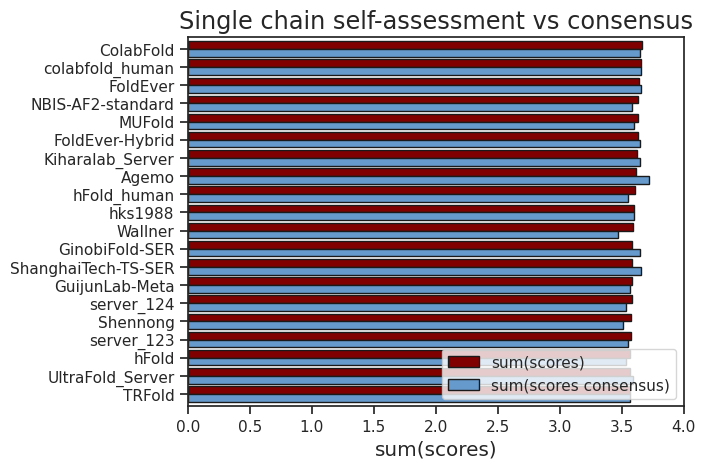

In [67]:
cred = (128.0/255,0.0,0.0)
cblue = (102.0/255,153.0/255,204.0/255)
colors = [cred, cblue]
for N in [10, 20]:
    plt.figure()
    ax = dfs_tst.head(N)[["combo_score", "combo_score_cons"]].plot(kind="barh", stacked=False, width=0.85,
                                                                   linewidth=1.0, edgecolor='k', color=colors)
    ax.invert_yaxis()
    ax.set_xlim([0, 4])
    ax.legend(loc='lower right', labels=["sum(scores)", "sum(scores consensus)"])
    plt.title("Single chain self-assessment vs consensus", fontsize="x-large")
    _ = plt.xlabel("sum(scores)", fontsize="large")
    _ = plt.ylabel("")
    plt.savefig(f"./plot_ts_qe_top_{N}_vs_cons.png", dpi=300, bbox_inches='tight')

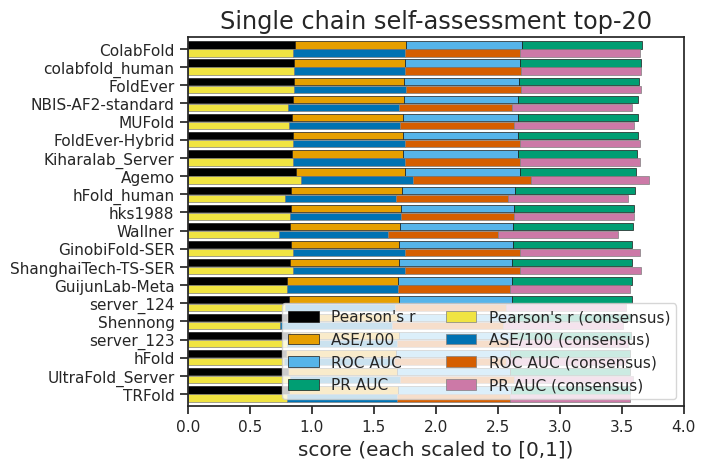

In [68]:
# EVERYTHING IN ONE?
sel_scores = ["pearson_r", "ase_casp_01", "roc_auc", "pr_auc"]
sel_scores_cons = [v + "_cons" for v in sel_scores]
# from GS: stolen from http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
ax = dfs_tst.head(20)[sel_scores].plot(kind="barh", stacked=True, width=0.8/2,
                                       linewidth=0.5, edgecolor='k', color=colors,
                                       position=1.05)
#print(ax.get_ylim())
ax = dfs_tst.head(20)[sel_scores_cons].plot(kind="barh", stacked=True, width=0.8/2,
                                       linewidth=0.5, edgecolor='0.5', color=colors[4:],
                                       position=-0.05, ax=ax)
#print(ax.get_ylim())
ax.set_ylim([-0.675, 19.675])
ax.set_xlim([0, 4])
ax.invert_yaxis()
labels = ["Pearson's r", "ASE/100", "ROC AUC", "PR AUC"]
labels += [(l + " (consensus)") for l in labels]
ax.legend(loc='lower right', labels=labels, ncol=2)
plt.title("Single chain self-assessment top-20", fontsize="x-large")
_ = plt.xlabel("score (each scaled to [0,1])", fontsize="large")
_ = plt.ylabel("", fontsize="large")
plt.savefig("./paper_plot_ts_qe_top_20_cons.png", dpi=300, bbox_inches='tight')

In [69]:
# keep data for Fig. in manuscript
sel_scores = ["pearson_r", "ase_casp_01", "roc_auc", "pr_auc", "combo_score"]
sel_scores_cons = [v + "_cons" for v in sel_scores]
sel_cols = ["group_id", "trg_count"] + sel_scores + sel_scores_cons + ["avg_lddt"]
dfs_tst[sel_cols].to_csv("./Fig6AB_ts_scores.csv")

In [70]:
# show pairwise lDDT for ColabFold?
group_id = dfs_tst.loc["ColabFold", "group_id"]
sub_df1 = df1[df1.group_id == group_id]
lddt_ref = np.concatenate(sub_df1.matched_lddts_ref.to_list())
lddt_mdl = np.concatenate(sub_df1.matched_lddts_mdl.to_list())
lddt_base = np.concatenate(sub_df1.matched_lddts_base.to_list())

In [71]:
df_to_plot = pd.DataFrame({
    "actual lDDT": lddt_ref,
    "pred. lDDT": lddt_mdl,
    "pred. lDDT consensus": lddt_base
})

In [72]:
df_to_plot.shape

(28456, 3)

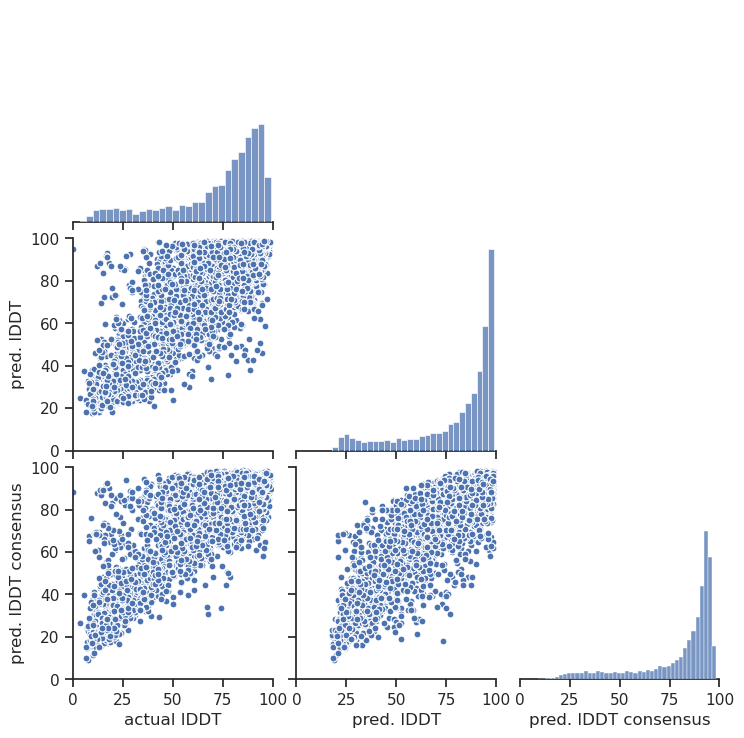

In [73]:
ax = sns.pairplot(df_to_plot.sample(5000), corner=True,
                  markers=".", plot_kws=dict(s=100))
_ = ax.set(xlim=(0,100), ylim=(0,100))

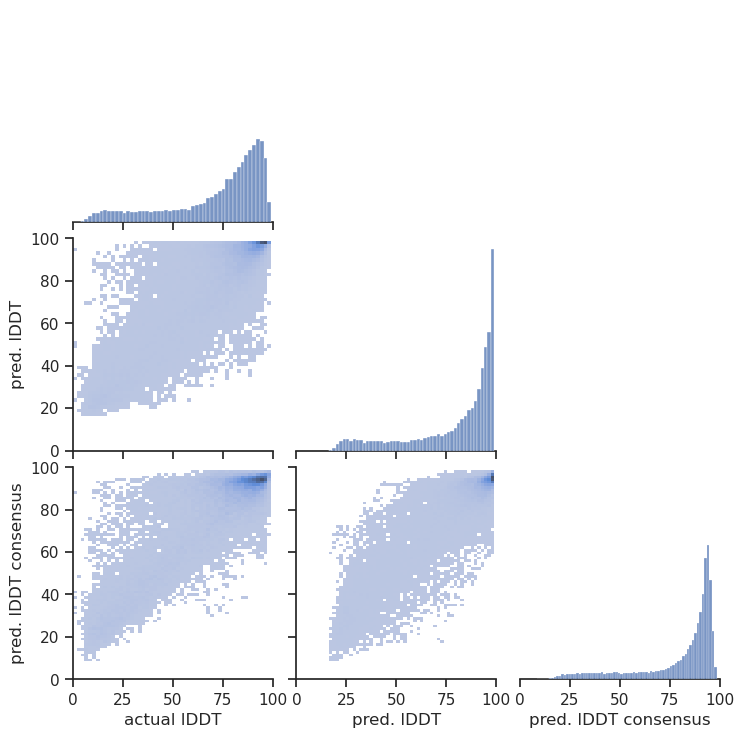

In [74]:
ax = sns.pairplot(df_to_plot, corner=True, kind="hist")
_ = ax.set(xlim=(0,100), ylim=(0,100))

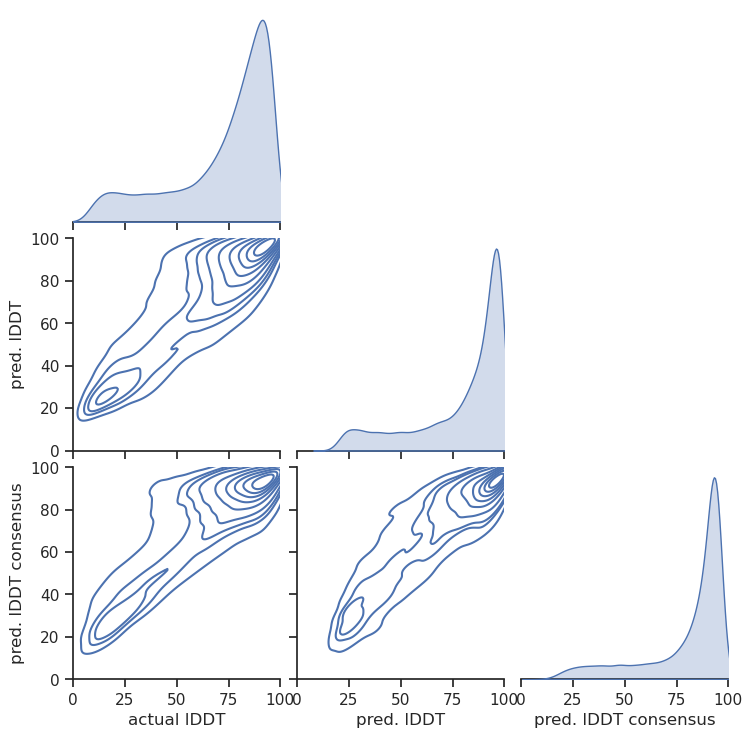

In [75]:
ax = sns.pairplot(df_to_plot, corner=True, kind="kde")
_ = ax.set(xlim=(0,100), ylim=(0,100))

In [76]:
# make csv for Gabriel
lddt_ref = np.concatenate(df1.matched_lddts_ref.to_list())
lddt_base = np.concatenate(df1.matched_lddts_base.to_list())
df_to_output = pd.DataFrame({
    "actual lDDT": lddt_ref,
    "pred. lDDT consensus": lddt_base
})
df_to_output.to_csv("consensus_lddt_all.csv", index=False)

# FOR PAPER

In [77]:
# some metadata
dfs.shape, dfpg_tot.shape

((90, 19), (133, 17))

In [78]:
# check groups vs pred. center
df_pc = pd.read_csv("./from_pred_center/ts_scored_groups.csv")
assert len(set(df_pc.Code)) == len(df_pc)
pc_names = df_pc.set_index("Code").Name.to_dict()

In [79]:
for idx in dfpg_tot.index:
    grp_name = grp_names.get(idx, None)
    ref_name = pc_names.get(int(idx), None)
    if grp_name != ref_name:
        print("MISMATCH", idx, grp_name, ref_name)
    elif grp_name is None:
        print("NONE", idx, dfpg_tot.loc[idx].trg_count)

NONE 317 1.0


<AxesSubplot:ylabel='Frequency'>

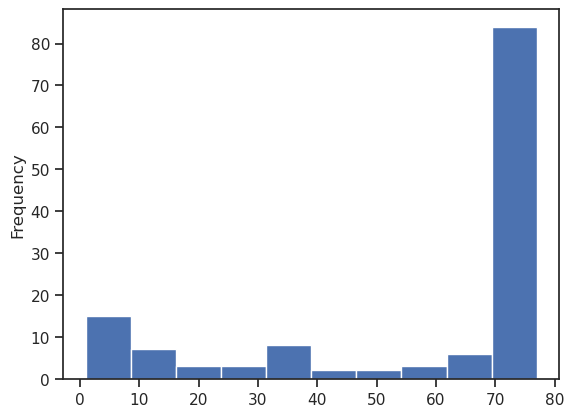

In [80]:
dfpg_tot.trg_count.plot(kind="hist")